<a href="https://colab.research.google.com/github/DavidScanu/oc-ai-engineer-p03-preparez-des-donnees-pour-un-organisme-de-sante-publique/blob/main/p03_scanu_david_01_notebook_2024_09_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![OpenClassrooms Banner Projet 3](https://raw.githubusercontent.com/DavidScanu/oc-ai-engineer-p03-preparez-des-donnees-pour-un-organisme-de-sante-publique/refs/heads/main/images/oc-banner-project-03-1660-v9.png)

# Projet 3 - Préparez des données pour un organisme de santé publique

> 🎓 OpenClassrooms • Parcours [AI Engineer](https://openclassrooms.com/fr/paths/795-ai-engineer) | 👋 *Etudiant* : [David Scanu](https://www.linkedin.com/in/davidscanu14/)

## 📝 Contexte

L'agence Santé publique France souhaite **améliorer sa base de données Open Food Facts** et fait appel aux services de votre entreprise. L’agence confie à votre entreprise **la création d’un système de suggestion ou d’auto-complétion** pour aider les usagers à remplir plus efficacement la base de données. Vous êtes missionné sur le projet de **nettoyage et exploration des données** en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

## ⚡ Mission : nettoyer et explorer les données

Voici les différentes étapes pour **nettoyer et explorer les données** :

1. **Traiter le jeu de données**
2. **Produire des visualisations**
3. Effectuer une **analyse univariée** pour chaque variable intéressante
4. Effectuer une **Analyse multivariée**
5. **Rédiger un rapport** d’exploration et une conclusion
6. Expliquer dans une présentation en quoi ce projet respecte les **5 grands principes du RGPD**.

## 💾 Jeux de données

> <a href="https://fr.openfoodfacts.org/" target="_blank"><img src="https://static.openfoodfacts.org/images/logos/off-logo-horizontal-light.svg" width=200 /></a>

- https://world.openfoodfacts.org/data
- [Description du jeu de données Open Food Facts](https://world.openfoodfacts.org/data/data-fields.txt)
- [Reusing Open Food Facts Data | Open Food Facts wiki](https://wiki.openfoodfacts.org/Reusing_Open_Food_Facts_Data#The_CSV_daily_export)

Les champs sont séparés en quatre sections :

1. **Informations générales** sur la fiche du produit : nom, date de modification, etc.
2. **Tags** : catégorie du produit, localisation, origine, etc.
3. **Ingrédients** composant les produits et leurs additifs éventuels
4. **Informations nutritionnelles** : quantité en grammes d’un nutriment pour 100 grammes du produit

## 🎯 Objectifs pédagogiques

- Déterminer les objectifs du nettoyage des données et de la démarche de mise en œuvre
- Effectuer des analyses statistiques univariées et multivariées
- Effectuer des opérations de nettoyage sur des données structurées
- Représenter des données grâce à des graphiques afin justifier les analyses réalisées

## 📦 Livrables

- [Notebook Colab](https://colab.research.google.com/drive/10W-7Lg2_5gn00mt5xfKLOc80I4wpa1_-?usp=sharing)
- [Présentation Google Slide](https://docs.google.com/presentation/d/1Ds5Nn1Iq59IzbzGmhGJk0eYeKoQaZMFe6PtR7Y1Nqps/edit?usp=sharing)
- [Dépôt GitHub](https://github.com/DavidScanu/oc-ai-engineer-p03-preparez-des-donnees-pour-un-organisme-de-sante-publique)

## ⚙️ Installation et importation des bibliothèques nécessaires

In [1]:
# !pip install plotly==5.24.0 --no-cache-dir --quiet

In [2]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st # perform correlation calculation
import plotly.express as px

In [3]:
# Apply the default theme for seaborn
sns.set_theme()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 🥗 Importation du jeu de données

### Téléchargement et extraction du fichier .zip

Les données mises à disposition sont issues de [Open Food Facts](https://world.openfoodfacts.org/) et présentent les données sur les produits alimentaires.

Nous téléchargeons et extrayons le fichier ZIP.

In [5]:
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip" -O temp.zip
!unzip temp.zip -d /content/data
!rm temp.zip

--2024-11-08 10:36:20--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 3.5.67.225, 52.218.91.27, 52.92.0.48, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|3.5.67.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88117814 (84M) [application/x-www-form-urlencoded]
Saving to: ‘temp.zip’

temp.zip            100%[===================>]  84.04M  23.0MB/s    in 3.7s    

2024-11-08 10:36:24 (23.0 MB/s) - ‘temp.zip’ saved [88117814/88117814]

Archive:  temp.zip
  inflating: /content/data/fr.openfoodfacts.org.products.csv  
   creating: /content/data/__MACOSX/
  inflating: /content/data/__MACOSX/._fr.openfoodfacts.org.products.csv  


### Correction d'irrégularités dans le fichier CSV

Nous allons corriger des irrégularités en supprimant les sauts de ligne superflus, puis écrire les données propres dans un nouveau fichier CSV.

In [6]:
data_folderpath = "/content/data/"
raw_csv_filepath = data_folderpath + "fr.openfoodfacts.org.products.csv"
clean_csv_filepath = data_folderpath + "fr.openfoodfacts.org.products-clean.csv"

In [7]:
import os

if not os.path.isfile(clean_csv_filepath):
    # Seulement si le fichier clean_csv n'est pas déjà présent
    with open(raw_csv_filepath, 'r') as csv_file, open(clean_csv_filepath, 'w') as clean_file:
        """
            Gérer les irrégularités dans le fichier CSV.
            23 points de données sont divisés à tort en deux lignes. Le schéma est toujours le même :
            - un caractère NewLine (`\n`) est placé à la fin de la colonne "first_packaging_code_geo"
            - et la ligne suivante commence par un séparateur TAB (`\t`) : la colonne "villes" est vide.

            Puisque la première colonne (« code ») n'est jamais vide, nous supprimons simplement tout caractère `\n` qui est
            directement suivi d'un séparateur TAB (`\t`).
        """
        data = csv_file.read()
        clean_file.write(data.replace('\n\t', '\t'))
        del data

### Chargement du ficher .csv dans un DataFrame

- Chargement des données dans un DataFrame
- Conversion des variables au bon **dtype**, avec l'aide de la [description des données fournie](https://static.openfoodfacts.org/data/data-fields.txt).

In [8]:
# Liste des noms des colonnes
column_names = pd.read_csv(clean_csv_filepath, sep='\t', encoding='utf-8', nrows=0, low_memory=True, on_bad_lines='error').columns.values

# Définir les types de colonnes en fonction de la description des champs (https://static.openfoodfacts.org/data/data-fields.txt)
column_types = {col: 'Int64' for (col) in column_names if col.endswith(('_t', '_n'))}
column_types |= {col: float for (col) in column_names if col.endswith(('_100g', '_serving'))}
column_types |= {col: str for (col) in column_names if not col.endswith(('_t', '_n', '_100g', '_serving', '_tags'))}

tags_converter = lambda list_as_string_value : list_as_string_value.split(',') if list_as_string_value else pd.NA

# Charger les données brutes
raw_data = pd.read_csv(
  clean_csv_filepath,
  sep='\t',
  encoding='utf-8',
  # low_memory=False,
  on_bad_lines='error',
  dtype=column_types,
  parse_dates=[col for (col) in column_names if col.endswith('_datetime')],
  converters={
      # Convertir les colonnes '_tags' en liste de valeurs (séparateur : ',')
      col: tags_converter
      for (col) in column_names if col.endswith('_tags')
  }
)

raw_data.shape

(320749, 162)

## 👀 Visualisation générale du jeu de données

In [9]:
# Vue globale
def namestr(obj, namespace):
    '''  returns variable name in namespace '''
    return [name for name in namespace if namespace[name] is obj]

def nb_lines(data):
    ''' returns number of rows'''
    return len(data)

def nb_columns(data):
    ''' returns number of columns'''
    return len(data.columns)

def missing_cells(data):
    ''' returns number of missing cells'''
    return data.isna().sum().sum()

def missing_cells_percent(data):
    ''' returns percentage of missing cells'''
    return data.isna().sum().sum()/(data.size)

def data_set_overview(data):
    '''
    Prints a dataframe summary containing: number of rows, columns, missing cells and duplicate
    rows
    '''
    print('***********************************')
    print('Data : {}'.format(namestr(data, globals())))
    print('Nombre de variables : {}'.format(nb_columns(data)))
    print('Nombre de lignes : {}'.format(nb_lines(data)))
    print('Valeurs manquantes : {}'.format(missing_cells(data)))
    print('Valeurs manquantes en % : {:.2%}'.format(missing_cells_percent(data)))
    print('***********************************')
    return None

data_set_overview(raw_data)

***********************************
Data : ['raw_data']
Nombre de variables : 162
Nombre de lignes : 320749
Valeurs manquantes : 39604863
Valeurs manquantes en % : 76.22%
***********************************


In [10]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   Int64  
 4    created_datetime                            object 
 5    last_modified_t                             Int64  
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

In [11]:
raw_data.head(8)

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
5  0000000016100  http://world-fr.openfoodfacts.org/produit/0000...   
6  0000000016117  http://world-fr.openfoodfacts.org/produit/0000...   
7  0000000016124  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t           created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17 09:17:46+00:00   
1             usda-ndb-import  1489069957  2017-03-09 14:32:37+00:00   
2             usda-ndb-import  1489069957  2017-03-09 14:32:37+00:00   
3             usda-ndb-import  1489055731  2017-03-09 10:35:31+00:00   
4             usda-ndb-import  1489055653  2017-03-09 10:34:13+00:00   
5             usda-ndb-import  1489055651  2017-03-09 10:34:11+00:00   
6             usda-ndb-import  1489055730  2017-03-09 10:35:30+00:00   
7             usda-ndb-import  1489055711  2017-03-09 10:35:11+00:00   

   last_modified_t     last_modified_datetime  \
0       1474103893  2016-09-17 09:18:13+00:00   
1       1489069957  2017-03-09 14:32:37+00:00   
2       1489069957  2017-03-09 14:32:37+00:00   
3       1489055731  2017-03-09 10:35:31+00:00   
4       1489055653  2017-03-09 10:34:13+00:00   
5       1489055651  2017-03-09 10:34:11+00:00   
6       1489055730  2017-03-09 10:35:30+00:00   
7       1489055712  2017-03-09 10:35:12+00:00   

                        product_name generic_name quantity packaging  \
0                 Farine de blé noir          NaN      1kg       NaN   
1     Banana Chips Sweetened (Whole)          NaN      NaN       NaN   
2                            Peanuts          NaN      NaN       NaN   
3             Organic Salted Nut Mix          NaN      NaN       NaN   
4                    Organic Polenta          NaN      NaN       NaN   
5  Breadshop Honey Gone Nuts Granola          NaN      NaN       NaN   
6      Organic Long Grain White Rice          NaN      NaN       NaN   
7                     Organic Muesli          NaN      NaN       NaN   

  packaging_tags           brands        brands_tags categories  \
0           <NA>  Ferme t'y R'nao  [ferme-t-y-r-nao]        NaN   
1           <NA>              NaN               <NA>        NaN   
2           <NA>   Torn & Glasser     [torn-glasser]        NaN   
3           <NA>        Grizzlies        [grizzlies]        NaN   
4           <NA>   Bob's Red Mill   [bob-s-red-mill]        NaN   
5           <NA>             Unfi             [unfi]        NaN   
6           <NA>         Lundberg         [lundberg]        NaN   
7           <NA>   Daddy's Muesli   [daddy-s-muesli]        NaN   

  categories_tags categories_fr origins origins_tags manufacturing_places  \
0            <NA>           NaN     NaN         <NA>                  NaN   
1            <NA>           NaN     NaN         <NA>                  NaN   
2            <NA>           NaN     NaN         <NA>                  NaN   
3            <NA>           NaN     NaN         <NA>                  NaN   
4            <NA>           NaN     NaN         <NA>                  NaN   
5            <NA>           NaN     NaN         <NA>                  NaN   
6            <NA>           NaN     NaN         <NA>                  NaN   
7            <NA>           NaN     NaN         <NA>                  NaN   

  manufacturing_places_tags labels labels_tags labels_fr emb_codes  \
0                      <NA>    NaN        <NA>       NaN       NaN   
1                      <NA>    NaN        <NA>       NaN       NaN   
2                      <NA>    NaN        <NA>       NaN       NaN   
3                      <NA>    NaN        <NA>       N

## Étape 1 : Nettoyez et filtrez des features et produits

- **Choix d'une cible** (une variable ayant moins de 50% de valeurs présente). Une cible **catégorielle** sera très probablement plus simple à gérer qu’une quantitative dans ce projet. Par exemple : **la catégorie d'aliment**. Choisir une variable que les gens renseigne mal ou peu.
- **Supprimer les lignes** (produits) n’ayant pas de valeur cible.
- **Séparer la cible** du reste du dataset.
- **Sélection des variables pertinentes** qui sont assez remplies (plus que 50%) et qui nous paraissent intéressantes pour effectuer la prédiction de notre cible.

### 🎯 Choix de la cible

> Extrait du mail de briefing : établir la faisabilité de **suggérer les valeurs manquantes** pour une variable dont **plus de 50% des valeurs sont manquantes**.

Nous cherchons une **cible** repondant aux critères suivants :
- Variable catégorielle
- Plus de 50 % de valeurs manquantes

#### Liste des variables catégorielles comprennant plus de 50% de valeurs manquantes et leur nombre de modalités

In [14]:
def cat_var_with_more_than_50_missing(df):
  # Liste des variable catégorielles comprennant plus de 50% de valeurs manquantes
  categorical_columns_with_more_than_50_missing = df.select_dtypes(include=['object']) \
      .loc[:, df.select_dtypes(include=['object']).isnull().mean() >= 0.5] \
      .columns.tolist()

  categorical_columns_with_more_than_50_missing_and_modalities = []
  for column in categorical_columns_with_more_than_50_missing:
    try:
      nb_modalities = df[column].nunique(dropna=True)
      categorical_columns_with_more_than_50_missing_and_modalities.append((column, nb_modalities))
    except:
      pass

  # Trier par nombre de modalités croissantes
  categorical_columns_with_more_than_50_missing_and_modalities.sort(key=lambda x: x[1])

  return categorical_columns_with_more_than_50_missing_and_modalities, categorical_columns_with_more_than_50_missing

categorical_columns_with_more_than_50_missing_and_modalities, categorical_columns_with_more_than_50_missing = cat_var_with_more_than_50_missing(raw_data)

print("Liste des variables catégorielles comprenant plus de 50% de valeurs manquantes et leur nombre de modalités :")
for column, nb_modalities in categorical_columns_with_more_than_50_missing_and_modalities:
  print(f"- {column} : {nb_modalities}")


Liste des variables catégorielles comprenant plus de 50% de valeurs manquantes et leur nombre de modalités :
- cities : 0
- allergens_fr : 0
- no_nutriments : 0
- ingredients_from_palm_oil : 0
- ingredients_that_may_be_from_palm_oil : 0
- nutrition_grade_uk : 0
- pnns_groups_1 : 14
- pnns_groups_2 : 42
- first_packaging_code_geo : 1602
- stores : 3255
- main_category : 3543
- main_category_fr : 3543
- traces_fr : 3577
- origins : 4818
- purchase_places : 5120
- manufacturing_places : 7288
- traces : 8361
- emb_codes : 8462
- allergens : 12921
- labels_fr : 13653
- quantity : 13816
- packaging : 14547
- labels : 18114
- categories_fr : 21142
- categories : 36976
- generic_name : 38562
- additives_fr : 41554
- image_url : 75855
- image_small_url : 75855


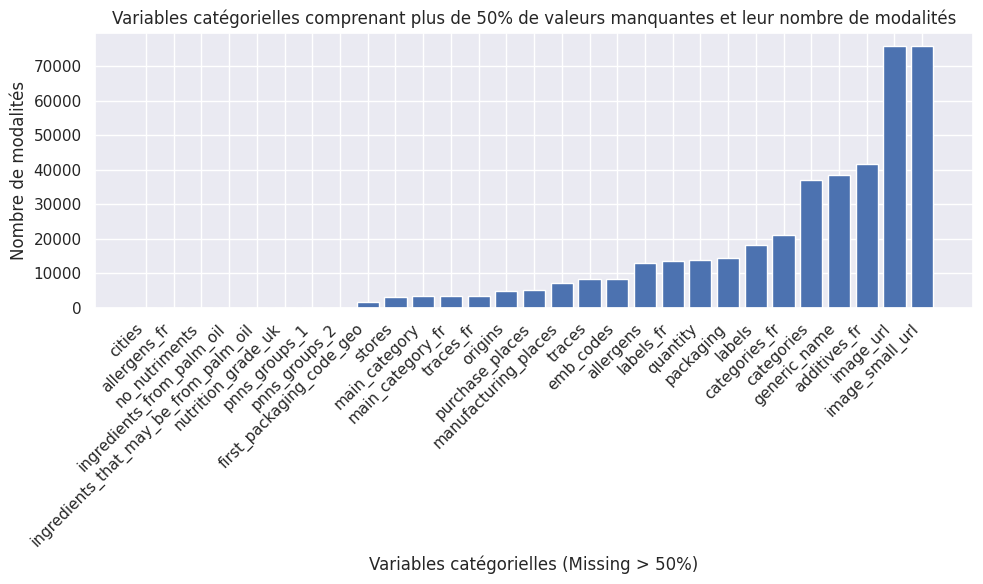

In [15]:
# Representation graphique en baton, nombre de modalité par variable

import matplotlib.pyplot as plt

# Assuming 'categorical_columns_with_more_than_50_missing_and_modalities'
# is defined as in the provided code.

# Extract column names and number of modalities
column_names = [col[0] for col in categorical_columns_with_more_than_50_missing_and_modalities]
modalities_count = [col[1] for col in categorical_columns_with_more_than_50_missing_and_modalities]


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(column_names, modalities_count)
plt.xlabel("Variables catégorielles (Missing > 50%)")
plt.ylabel("Nombre de modalités")
plt.title("Variables catégorielles comprenant plus de 50% de valeurs manquantes et leur nombre de modalités")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Remarque** : Certaines variables dans `categorical_columns_with_more_than_50_missing`, dont le nom se termine par `_tags`, contiennent des valeurs de type `list`. Nous ne les utiliserons pas comme cible.

In [16]:
print(f"Les variables suivantes contiennent des valeurs de type `list` :")

for column in categorical_columns_with_more_than_50_missing:
  # Vérifie que la colonne a une valeur non-nulle après dropna()
  if raw_data[column].dropna().size > 0:
    # Si la valeur est une liste
    if isinstance(raw_data[column].dropna().iloc[0], list):
      print(f"- {column}")

Les variables suivantes contiennent des valeurs de type `list` :
- packaging_tags
- categories_tags
- origins_tags
- manufacturing_places_tags
- labels_tags
- emb_codes_tags
- cities_tags
- traces_tags
- additives_tags
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags


#### Afficher les modalités pour `pnns_groups_1` et `pnns_groups_2`

In [17]:
def print_modalities(df, col):
  modalities_list = sorted(df[col].dropna().unique().tolist(), key=str.lower)
  print(f"Il y a {len(modalities_list)} modalités pour la variable `{col}` :")
  for modality in modalities_list:
    print(f"- {modality}")
  # return modalities_list

print_modalities(raw_data, 'pnns_groups_1')
print('\n-----\n')
print_modalities(raw_data, 'pnns_groups_2')

Il y a 14 modalités pour la variable `pnns_groups_1` :
- Beverages
- Cereals and potatoes
- cereals-and-potatoes
- Composite foods
- Fat and sauces
- Fish Meat Eggs
- Fruits and vegetables
- fruits-and-vegetables
- Milk and dairy products
- Salty snacks
- salty-snacks
- Sugary snacks
- sugary-snacks
- unknown

-----

Il y a 42 modalités pour la variable `pnns_groups_2` :
- Alcoholic beverages
- Appetizers
- Artificially sweetened beverages
- Biscuits and cakes
- Bread
- Breakfast cereals
- Cereals
- cereals
- Cheese
- Chocolate products
- Dairy desserts
- Dressings and sauces
- Dried fruits
- Eggs
- Fats
- Fish and seafood
- Fruit juices
- Fruit nectars
- Fruits
- fruits
- Ice cream
- Legumes
- legumes
- Meat
- Milk and yogurt
- Non-sugared beverages
- Nuts
- nuts
- One-dish meals
- pastries
- Pizza pies and quiche
- Potatoes
- Processed meat
- Salty and fatty products
- Sandwich
- Soups
- Sweetened beverages
- Sweets
- Tripe dishes
- unknown
- Vegetables
- vegetables


> 🎯 Nous décidons de choisir la variable catégorielle `pnns_groups_1` comme **cible**.

### 🧼 Nettoyage de la cible `pnns_groups_1`

#### Correction d'erreurs de formatage dans `pnns_groups_1`

Certaines modalités apparaissent en double avec une **légère différence de formatage** : premier caractère en minuscule, et des `-` à la place des espaces. Nous remplaçons le premier caractère par une majuscule et les - par des espaces.

In [18]:
# Nouveau DataFrame dans lequel nous effectuerons nos opérations de nettoyage
clean_data = raw_data.copy()

In [112]:
# Nombre de modalités avant correction des erreurs de formatage
print(f"Nombre de modalités avant correction des erreurs de formatage : {clean_data['pnns_groups_1'].nunique()}.")

Nombre de modalités avant correction des erreurs de formatage : 9.


In [20]:
# Premier caractère en majuscule et remplacer les '-' par des espaces
clean_data['pnns_groups_1'] = clean_data['pnns_groups_1'].str.title().str.replace('-', ' ')
print_modalities(clean_data, 'pnns_groups_1')

Il y a 10 modalités pour la variable `pnns_groups_1` :
- Beverages
- Cereals And Potatoes
- Composite Foods
- Fat And Sauces
- Fish Meat Eggs
- Fruits And Vegetables
- Milk And Dairy Products
- Salty Snacks
- Sugary Snacks
- Unknown


#### Répartition des modalités de `pnns_groups_1`

In [22]:
clean_data['pnns_groups_1'].value_counts().sort_values(ascending=False)

pnns_groups_1
Unknown                    22626
Sugary Snacks              12864
Beverages                   9033
Milk And Dairy Products     8846
Cereals And Potatoes        8458
Fish Meat Eggs              8041
Fruits And Vegetables       6895
Composite Foods             6747
Fat And Sauces              5216
Salty Snacks                2810
Name: count, dtype: int64

#### 🚨 Suppression des lignes dont la modalité est `Unknown`

La modalité `Unknown` ne nous apporte aucune information. Nous décidons de **supprimer les lignes** comportant cette modalité. Ces lignes pourront être modifiées / enrichies par notre future algorithme de suggestion / complétion.  

In [23]:
clean_data.shape

(320749, 162)

In [24]:
# Suppression des lignes dont la modalité est Unknown
clean_data = clean_data[clean_data['pnns_groups_1'] != 'Unknown']

In [25]:
# Afficher un graphique de la repartition des modalités classées par ordre décroissant
fig = px.histogram(clean_data, x='pnns_groups_1', title='Répartition des modalités de pnns_groups_1')
fig.update_layout(xaxis_title='pnns_groups_1', yaxis_title='Nombre de produits')
fig.update_xaxes(categoryorder='total descending')
fig.show()

#### 🚨 Suppression des lignes pour lesquelles `pnns_groups_1` est vide

In [26]:
# Supprimer les lignes dont pnns_groups_1 est vide
clean_data.dropna(subset=['pnns_groups_1'], inplace=True)
clean_data.shape

(68910, 162)

### Sélection des variables pertinentes

> **Sélection des variables** qui nous paraissent intéressantes pour effectuer la prédiction de notre cible.

Nous allons chercher à n'utiliser que les variables pertinentes pour prédire notre cible :
- Celles pour lesquelles nous avons **suffisament de valeurs remplies** pour pouvoir faire une analyse statistique fiable (> 50% de valeurs non-nulles).
- Celles qui nous semblent pertinentes pour prédire la cible que nous avons choisi.  

#### Variables remplies à plus de 50 %

In [27]:
# Calcul du pourcentage de valeurs non nulles pour chaque colonne
percentage_non_null = clean_data.notnull().mean() * 100

# Sélection des colonnes remplies à plus de 50 %
columns_more_than_50_percent_filled = percentage_non_null[percentage_non_null > 50].index.tolist()

# Colonnes remplies à plus de 50 % + taux de remplissage
columns_more_than_50_percent_filled_and_filling_rate = []
for column in columns_more_than_50_percent_filled:
  columns_more_than_50_percent_filled_and_filling_rate += [(column, round(percentage_non_null[column], 2))]

# Trie par taux de remplissage décroissant
columns_more_than_50_percent_filled_and_filling_rate.sort(key=lambda x: x[1], reverse=True)

print(f"Il y a {len(columns_more_than_50_percent_filled)} variables remplies à plus de 50% :")
# for column, filling_rate in columns_more_than_50_percent_filled_and_filling_rate:
#   print(f"- {column} : {filling_rate} %")

df_more_than_50_percent_filled_and_filling_rate = pd.DataFrame(columns_more_than_50_percent_filled_and_filling_rate, columns=['Variable', 'Taux de remplissage en %'])
df_more_than_50_percent_filled_and_filling_rate

Il y a 50 variables remplies à plus de 50% :


Variable  Taux de remplissage en %
0                                      code                    100.00
1                                       url                    100.00
2                                   creator                    100.00
3                                 created_t                    100.00
4                          created_datetime                    100.00
5                           last_modified_t                    100.00
6                    last_modified_datetime                    100.00
7                                categories                    100.00
8                           categories_tags                    100.00
9                             categories_fr                    100.00
10                            pnns_groups_1                    100.00
11                            pnns_groups_2                    100.00
12                                   states                    100.00
13                              states_tags                    100.00
14                                states_fr                    100.00
15                            main_category                    100.00
16                         main_category_fr                    100.00
17                                countries                     99.92
18                           countries_tags                     99.92
19                             countries_fr                     99.92
20                             product_name                     99.21
21                                   brands                     98.59
22                              brands_tags                     98.58
23                                 quantity                     94.34
24                                packaging                     89.43
25                           packaging_tags                     89.43
26                         ingredients_text                     83.96
27                              additives_n                     83.96
28              ingredients_from_palm_oil_n                     83.96
29  ingredients_that_may_be_from_palm_oil_n                     83.96
30                                additives                     83.94
31                              energy_100g                     79.89
32                            proteins_100g                     79.20
33                                 fat_100g                     76.48
34                       carbohydrates_100g                     75.88
35                                salt_100g                     75.50
36                              sodium_100g                     75.50
37                              sugars_100g                     75.28
38                       saturated-fat_100g                     74.98
39                       nutrition_grade_fr                     73.46
40                  nutrition-score-fr_100g                     73.46
41                  nutrition-score-uk_100g                     73.46
42                                image_url                     72.41
43                          image_small_url                     72.41
44                          purchase_places                     68.23
45                             generic_name                     62.97
46                                   stores                     61.54
47                              labels_tags                     51.43
48                                labels_fr                     51.43
49                                   labels                     51.33

In [28]:
# Graphique montrant le taux de remplissage des variables remplies à plus de 50%
fig = px.bar(
    x=percentage_non_null[columns_more_than_50_percent_filled].sort_values(ascending=False).index,
    y=percentage_non_null[columns_more_than_50_percent_filled].sort_values(ascending=False).values,
    labels={'x': 'Colonnes', 'y': 'Taux de remplissage (%)'},
    title='Taux de remplissage des colonnes'
)
fig.show()

In [29]:
def variables_by_nature(df, cols):
  # Variables quantitatives
  quantitative_variables = df[cols].select_dtypes(include=['number']).columns.tolist()
  # Variables qualitatives
  qualitative_variables = df[cols].select_dtypes(include=['object']).columns.tolist()
  return quantitative_variables, qualitative_variables

In [30]:
quantitative_variables, qualitative_variables = variables_by_nature(clean_data, columns_more_than_50_percent_filled)

In [31]:
def print_variables_by_nature(quantitative_variables, qualitative_variables):
  print("Variables quantitatives :")
  for var in quantitative_variables:
      print(f"- {var}")

  print("\nVariables qualitatives :")
  for var in qualitative_variables:
      print(f"- {var}")

In [32]:
print_variables_by_nature(quantitative_variables, qualitative_variables)

Variables quantitatives :
- created_t
- last_modified_t
- additives_n
- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- proteins_100g
- salt_100g
- sodium_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g

Variables qualitatives :
- code
- url
- creator
- created_datetime
- last_modified_datetime
- product_name
- generic_name
- quantity
- packaging
- packaging_tags
- brands
- brands_tags
- categories
- categories_tags
- categories_fr
- labels
- labels_tags
- labels_fr
- purchase_places
- stores
- countries
- countries_tags
- countries_fr
- ingredients_text
- additives
- nutrition_grade_fr
- pnns_groups_1
- pnns_groups_2
- states
- states_tags
- states_fr
- main_category
- main_category_fr
- image_url
- image_small_url


#### Sélection manuelle des colonnes pertinentes

Parmis les 50 variables remplies à plus de 50%, nous décidons de **sélectionner les variables pertinentes** pour effectuer la prédiction de notre cible. Avec l'aide de la [description des données](https://world.openfoodfacts.org/data/data-fields.txt), nous décidons d'éliminer manuellement les variables suivantes :

- Identifiant (`code`)
- L'url du produit (`url`)
- Auteur (`creator`)
- Les dates (`created_t`, `created_datetime`, `last_modified_t`, `last_modified_datetime`)
- Les quantités car problème de formatage (`quantity`)
- Etat dans la base de données (`states`, `states_tags`, `states_fr`)
- Variables catégorielles ayant trop de modalités (`product_name`, `generic_name`, `brands`, `purchase_places`, `stores`, `countries`, `ingredients_text`)
- La catégorie d'aliment en langue étrangère (`main_category`). Nous conservons la catégorie en langue française (`main_category_fr`).
- Les URL de l'image (`image_url`, `image_small_url`). **Recommandation** : L'image pourrait être utilisé pour développer un modèle de classification basé sur l'image.
- Les variables qui sont des **tags** (souvent se terminant par `_tags`) sont des listes de valeurs (string). Leur utilisation étant plus difficile, nous ne les utiliserons pas : `packaging`, `packaging_tags`, `brands_tags`, `categories`, `categories_tags`, `categories_fr`, `labels`, `labels_tags`, `labels_fr`, `countries_tags`, `additives`.

##### Liste des variables sélectionnées

2 variables **qualitatives** :
- main_category_fr
- nutrition_grade_fr

13 variables **quantitatives** :
- additives_n
- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- proteins_100g
- salt_100g
- sodium_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g

In [33]:
selected_cols = ['pnns_groups_1',
                 'pnns_groups_2',
                 'main_category_fr',
                 'nutrition_grade_fr',
                 'additives_n',
                 'ingredients_from_palm_oil_n',
                 'ingredients_that_may_be_from_palm_oil_n',
                 'energy_100g',
                 'fat_100g',
                 'saturated-fat_100g',
                 'carbohydrates_100g',
                 'sugars_100g',
                 'proteins_100g',
                 'salt_100g',
                 'sodium_100g',
                 'nutrition-score-fr_100g',
                 'nutrition-score-uk_100g'
                 ]

#### `pnns_groups_2` apparait être un sous-groupe de `pnns_groups_1`

D'après le regroupement suivant, `pnns_groups_2` apparait être un sous-groupe de `pnns_groups_1`.

**Si une variable qualitative est un sous-groupe d'une autre**, cela crée une **redondance** et peut introduire une forme de **multicolinéarité**, où l'une des variables contient des informations implicites sur l'autre. Cela peut dégrader la performance et l'interprétabilité du modèle, surtout si les relations ne sont pas correctement traitées.

**Nous décidons de l'éliminer de nos variables.**



In [34]:
# Montrer le lien entre 'pnns_groups_1' et 'pnns_groups_2'
clean_data.groupby(['pnns_groups_1', 'pnns_groups_2']).size()

pnns_groups_1            pnns_groups_2                   
Beverages                Artificially Sweetened Beverages     261
                         Fruit Juices                        1924
                         Fruit Nectars                        376
                         Non Sugared Beverages               4302
                         Sweetened Beverages                 2170
Cereals And Potatoes     Bread                               1838
                         Breakfast Cereals                   1408
                         Cereals                             4118
                         Legumes                              929
                         Potatoes                             165
Composite Foods          One Dish Meals                      5546
                         Pizza Pies And Quiche                515
                         Sandwich                             686
Fat And Sauces           Dressings And Sauces                3602
                         Fats                                1614
Fish Meat Eggs           Eggs                                 462
                         Fish And Seafood                    2638
                         Meat                                1694
                         Processed Meat                      3247
Fruits And Vegetables    Dried Fruits                         497
                         Fruits                              2121
                         Soups                                503
                         Vegetables                          3774
Milk And Dairy Products  Cheese                              4024
                         Dairy Desserts                       783
                         Ice Cream                            721
                         Milk And Yogurt                     3318
Salty Snacks             Appetizers                          2101
                         Nuts                                 690
                         Salty And Fatty Products              19
Sugary Snacks            Biscuits And Cakes                  4561
                         Chocolate Products                  3109
                         Pastries                             496
                         Sweets                              4698
dtype: int64

#### Elimination des variables corrélées


**Conserver des variables fortement corrélées** dans un modèle de machine learning peut entraîner un problème de **multicolinéarité**. Cela signifie que les variables redondantes transmettent la même information, rendant difficile pour l'algorithme de différencier leur impact individuel. Cela peut fausser les coefficients des modèles linéaires, réduire l'interprétabilité, et augmenter la variance des estimations, ce qui dégrade la performance générale du modèle, notamment en termes de généralisation sur de nouvelles données.

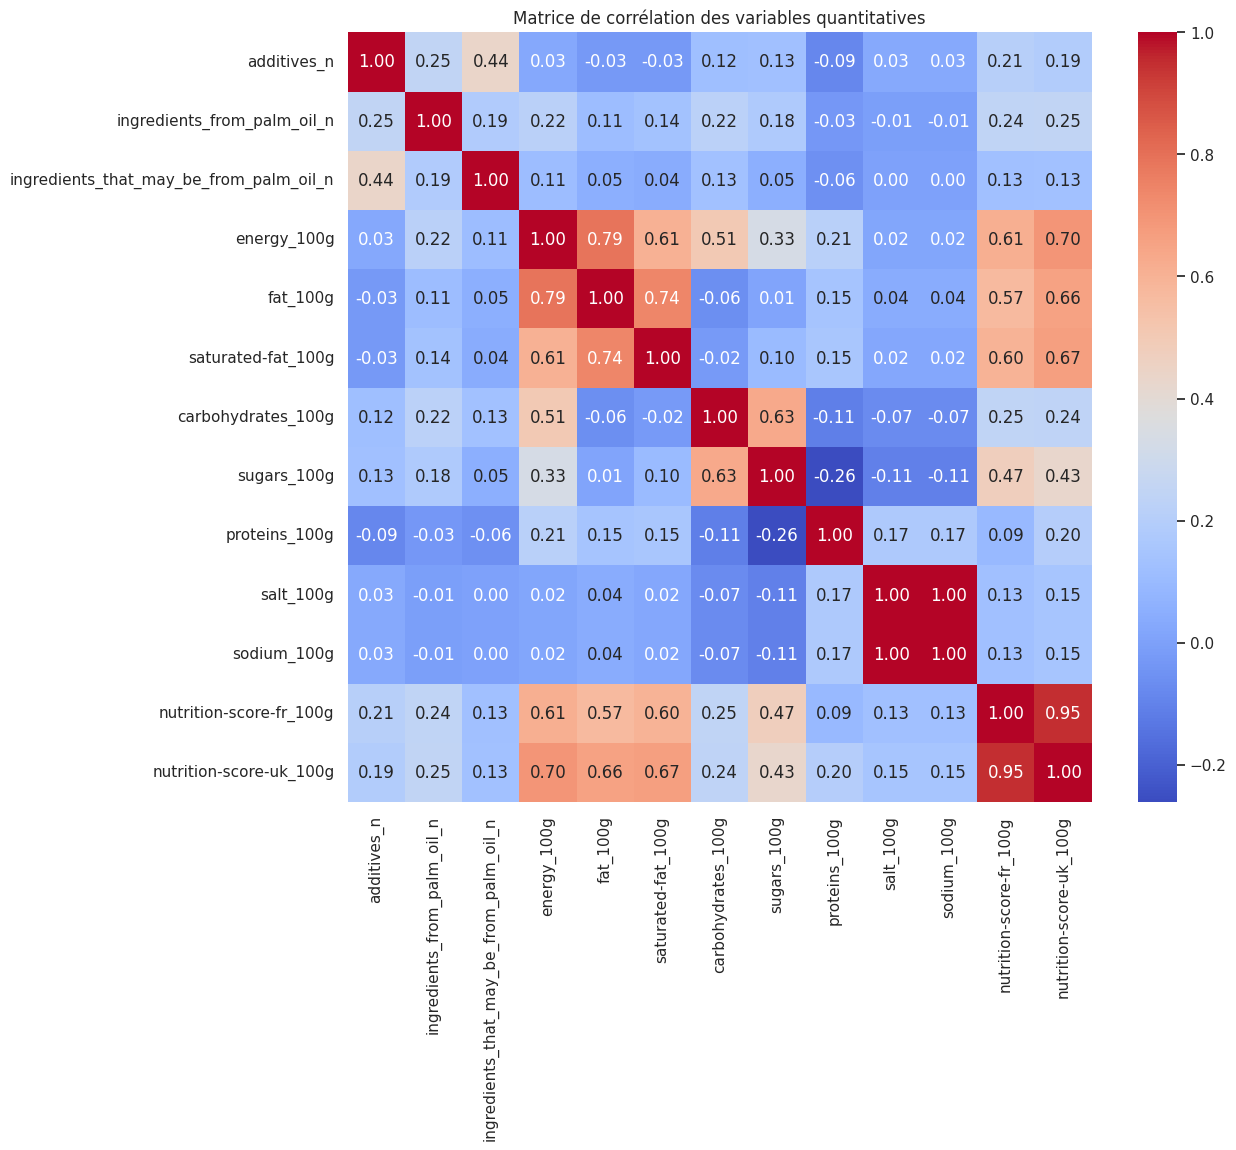

In [35]:
# Matrice de corrélation (variable quantitatives)

# Sélection des variables quantitatives
quantitative_variables = clean_data[selected_cols].select_dtypes(include=np.number).columns.tolist()

# Calcul de la matrice de corrélation
correlation_matrix = clean_data[quantitative_variables].corr()

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()

D'après la matrice de correlation suivante, nous décidons d'éliminer les variables suivantes :

- `sodium_100g` : car elle est très **fortement corrélée** à `salt_100g`.
- `nutrition-score-uk_100g` : car elle est très fortement corrélée à `nutrition-score-fr_100g`


Faire attention :
- Sucre
- graisses saturées

#### Variables sélectionnées

In [36]:
# Variables sélectionnées pour notre analyse
selected_cols = ['pnns_groups_1',
                 'main_category_fr',
                 'nutrition_grade_fr',
                 'additives_n',
                 'ingredients_from_palm_oil_n',
                 'ingredients_that_may_be_from_palm_oil_n',
                 'energy_100g',
                 'fat_100g',
                 'saturated-fat_100g',
                 'carbohydrates_100g',
                 'sugars_100g',
                 'proteins_100g',
                 'salt_100g',
                 'nutrition-score-fr_100g'
                 ]

#### Sous-échantillon des données

In [113]:
subset_data = clean_data[selected_cols].copy()
print(f"Le sous-échantillon des données comprend à présent :\n- {subset_data.shape[0]} lignes\n- {subset_data.shape[1]} colonnes")

Le sous-échantillon des données comprend à présent :
- 68910 lignes
- 14 colonnes


In [38]:
quantitative_variables, qualitative_variables = variables_by_nature(subset_data, selected_cols)

print(f"Notre DataFrame contient {len(selected_cols)} colonnes.\n")
print_variables_by_nature(quantitative_variables, qualitative_variables)

Nous avons sélectionné 14 variables.

Variables quantitatives :
- additives_n
- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- proteins_100g
- salt_100g
- nutrition-score-fr_100g

Variables qualitatives :
- pnns_groups_1
- main_category_fr
- nutrition_grade_fr


In [39]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68910 entries, 174 to 320746
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   pnns_groups_1                            68910 non-null  object 
 1   main_category_fr                         68910 non-null  object 
 2   nutrition_grade_fr                       50618 non-null  object 
 3   additives_n                              57855 non-null  Int64  
 4   ingredients_from_palm_oil_n              57855 non-null  Int64  
 5   ingredients_that_may_be_from_palm_oil_n  57855 non-null  Int64  
 6   energy_100g                              55051 non-null  float64
 7   fat_100g                                 52701 non-null  float64
 8   saturated-fat_100g                       51670 non-null  float64
 9   carbohydrates_100g                       52290 non-null  float64
 10  sugars_100g                              51873 n

In [40]:
subset_data[selected_cols].head()

pnns_groups_1                         main_category_fr  \
174  Fruits And Vegetables                            Légumes frais   
175          Sugary Snacks                              Pâtisseries   
177   Cereals And Potatoes                                    Pains   
180          Sugary Snacks                              Pâtisseries   
182   Cereals And Potatoes  Aliments et boissons à base de végétaux   

    nutrition_grade_fr  additives_n  ingredients_from_palm_oil_n  \
174                  c            0                            0   
175                NaN           10                            0   
177                NaN            0                            0   
180                  c            5                            0   
182                NaN            0                            0   

     ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
174                                        0       1210.0      12.0   
175                                        1       1520.0      14.4   
177                                        0          NaN       NaN   
180                                        0       1090.0      10.7   
182                                        0          NaN       NaN   

     saturated-fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
174                 7.0                23.0          0.0          22.00   
175                 NaN                54.1         28.1           4.79   
177                 NaN                 NaN          NaN            NaN   
180                 2.0                38.7         24.7           3.33   
182                 NaN                 NaN          NaN            NaN   

     salt_100g  nutrition-score-fr_100g  
174      2.160                      6.0  
175      0.922                      NaN  
177        NaN                      NaN  
180      0.647                      9.0  
182        NaN                      NaN

### 🚨 Suppression des lignes en double

In [41]:
subset_data.shape

(68910, 14)

In [42]:
# Lignes en double
duplicate_rows = subset_data[subset_data.duplicated()]
print(f"Il y a {len(duplicate_rows)} lignes en double dans 'subset_data'.")

Il y a 16883 lignes en double dans 'subset_data'.


In [43]:
# Suppression des lignes en double
subset_data = subset_data.drop_duplicates()
subset_data.shape

(52027, 14)

## Étape 2 : Identifiez et traitez les valeurs aberrantes

###  Identifiez et traitez les valeurs aberrantes des variables qualitatives

- `pnns_groups_1` (cible)
- `main_category_fr`
- `nutrition_grade_fr`

In [44]:
# Nombre de modalité pour chaque variable qualitative
for variable in qualitative_variables:
  print(f"La variable '{variable}' a {subset_data[variable].nunique()} modalités.")

La variable 'pnns_groups_1' a 9 modalités.
La variable 'main_category_fr' a 133 modalités.
La variable 'nutrition_grade_fr' a 5 modalités.


In [45]:
print(subset_data['pnns_groups_1'].value_counts().sort_values(ascending=False))

pnns_groups_1
Sugary Snacks              10254
Milk And Dairy Products     6958
Cereals And Potatoes        6779
Composite Foods             6090
Beverages                   5967
Fish Meat Eggs              5410
Fruits And Vegetables       4538
Fat And Sauces              3671
Salty Snacks                2360
Name: count, dtype: int64


In [46]:
# Afficher les modalités pour les variables qualitatives
for col in qualitative_variables:
  # print_modalities(subset_data, col)
  print(f"Modalités de la variable '{col}':")
  print(subset_data[col].value_counts().sort_values(ascending=False))
  print("\n")

Modalités de la variable 'pnns_groups_1':
pnns_groups_1
Sugary Snacks              10254
Milk And Dairy Products     6958
Cereals And Potatoes        6779
Composite Foods             6090
Beverages                   5967
Fish Meat Eggs              5410
Fruits And Vegetables       4538
Fat And Sauces              3671
Salty Snacks                2360
Name: count, dtype: int64


Modalités de la variable 'main_category_fr':
main_category_fr
Chocolats                                  2254
Boissons                                   2188
Epicerie                                   2091
Aliments et boissons à base de végétaux    1884
Conserves                                  1868
Biscuits                                   1862
Plats préparés                             1845
Petit-déjeuners                            1582
Pains                                      1459
Fromages                                   1329
Surgelés                                   1295
Desserts                     

###  Identifiez et traitez les valeurs aberrantes des variables quantitatives

1. additives_n
2. ingredients_from_palm_oil_n
3. ingredients_that_may_be_from_palm_oil_n
4. energy_100g
5. fat_100g
6. saturated-fat_100g
7. carbohydrates_100g
8. sugars_100g
9. proteins_100g
10. salt_100g
11. nutrition-score-fr_100g

A noter : possibilité de remplacer une valeur aberrante par NaN.

In [47]:
subset_data.shape

(52027, 14)

In [48]:
subset_data[quantitative_variables].describe()

additives_n  ingredients_from_palm_oil_n  \
count      46132.0                      46132.0   
mean      1.991243                     0.065963   
std       2.610405                     0.252119   
min            0.0                          0.0   
25%            0.0                          0.0   
50%            1.0                          0.0   
75%            3.0                          0.0   
max           31.0                          2.0   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                                  46132.0  50356.000000  47873.000000   
mean                                  0.152887   1085.857220     13.236564   
std                                   0.463272    801.223184     16.818728   
min                                        0.0      0.000000      0.000000   
25%                                        0.0    375.000000      1.000000   
50%                                        0.0    985.000000      6.500000   
75%                                        0.0   1647.000000     21.500000   
max                                        5.0  22000.000000    380.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g  proteins_100g  \
count        47202.000000        47674.000000  47382.000000   49890.000000   
mean             5.375305           27.648366     13.253765       7.429284   
std              8.313846           27.116142     18.477080       7.231079   
min              0.000000            0.000000     -0.100000       0.000000   
25%              0.200000            4.500000      1.100000       1.600000   
50%              1.900000           14.200000      4.500000       5.855000   
75%              7.500000           53.000000     17.000000      10.100000   
max            210.000000          190.000000    134.000000      86.000000   

          salt_100g  nutrition-score-fr_100g  
count  47539.000000             46138.000000  
mean       0.893324                 8.435433  
std        2.739337                 9.186821  
min        0.000000               -15.000000  
25%        0.070000                 1.000000  
50%        0.508000                 8.000000  
75%        1.200000                15.000000  
max      297.600000                40.000000

#### Valeurs minimum négatives

Nous observons des valeurs négatives pour la variable `sugars_100g`, ce qui est impossible.

> Nous décidons de supprimer les lignes dont `sugars_100g` est négative.

La variable `nutrition-score-fr_100g` peut être négative, d'après les informations suivantes :
- **Score minimum** : Peut être aussi bas que -15 (ou inférieur) pour des aliments très peu nutritifs.
- **Score maximum** : Peut atteindre +40 (ou plus) pour des aliments très nutritifs.

Nous observons bien la valeur minimum -15 et la valeur maximum 40 pour la variable `nutrition-score-fr_100g`.

In [49]:
print(f"Nombre de lignes pour lesquelles `sugars_100g` est négative : {len(subset_data[subset_data['sugars_100g'] < 0])}")

Nombre de lignes pour lesquelles `sugars_100g` est négative : 1


In [50]:
# Supprimer les lignes pour lesquelles sugars_100g est négative (en conservant les NaNs)
subset_data = subset_data[subset_data['sugars_100g'].ge(0) | subset_data['sugars_100g'].isnull()]
print(subset_data.shape)

(52026, 14)


#### Valeurs maximum des macros-nutriments dépassent 100

**Maximum** : Nous observons des valeurs aberrantes pour les variables des marco-nutriments (pour 100 g) car **elles dépassent 100**.

In [51]:
var_macros = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']

In [52]:
# Montrer les valeur maximum pour les variables 'var_macros' et le nombre de lignes concernées

max_values_dict = {}

for var in var_macros:
  max_value = subset_data[var].max()
  row_count = len(subset_data[subset_data[var] > 100])
  max_values_dict[var] = (max_value, row_count)

df_max_values = pd.DataFrame.from_dict(max_values_dict, orient='index', columns=['Valeur maximale', 'Nombre de lignes > 100'])
df_max_values

Valeur maximale  Nombre de lignes > 100
fat_100g                      380.0                       3
saturated-fat_100g            210.0                       1
carbohydrates_100g            190.0                       5
sugars_100g                   134.0                       2
proteins_100g                  86.0                       0
salt_100g                     297.6                       3

In [53]:
# Compter les lignes dans lesquelles var_macros dépassent 100
count_rows_macros_over_100 = 0
for index, row in subset_data.iterrows():
  for col in var_macros:
    if row[col] > 100:
      count_rows_macros_over_100 += 1
      break  # Break the inner loop if any macro nutrient is over 100
print(f"Il y a {count_rows_macros_over_100} lignes pour lesquelles au moins une variable dans `var_macros` dépasse 100.")

Il y a 10 lignes pour lesquelles au moins une variable dans `var_macros` dépasse 100.


In [54]:
# Supprimer les lignes dans lesquelles les macros dépassent 100 (en conservant les NaNs)
subset_data = subset_data[~(subset_data[var_macros] > 100).any(axis=1)]
subset_data.shape

(52016, 14)

#### Somme des macro-nutriments dépassent 100

Par définition, la somme des variables `fat_100g`, `carbohydrates_100g` `proteins_100g`, `salt_100g` ne peut pas dépasser 100.



In [55]:
# Trouver les lignes dont la somme des colonnes var_main_macros est supérieure à 100 et supprimer ces lignes (en conservant les NaNs)

# Macro-nutriements
var_main_macros = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']

# Calcul de la somme des colonnes var_main_macros pour chaque ligne
subset_data['sum_var_main_macros'] = subset_data[var_main_macros].sum(axis=1)

print(f"Nombre de lignes dont la somme des macro-nutriments dépasse 100 : {subset_data[subset_data['sum_var_main_macros'] > 100].shape[0]}")

# Suppression des lignes où la somme est supérieure à 100
subset_data = subset_data[subset_data['sum_var_main_macros'].le(100) | subset_data['sum_var_main_macros'].isnull()]

# Suppression de la colonne temporaire 'sum_var_main_macros'
subset_data = subset_data.drop('sum_var_main_macros', axis=1)

print(subset_data.shape)

Nombre de lignes dont la somme des macro-nutriments dépasse 100 : 155
(51861, 14)


<ipython-input-55-03811e0cb193>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Valeur maximum pour `energy_100g` dépasse 3700 Kj

Pour la variable `energy_100g`, la valeur maximum possible est **3700 Kj**.

> Nous décidons de supprimer les lignes dont la valeur maximum de `energy_100g` dépasse 3700 KJ.

In [56]:
# Nombre de lignes dont energy_100g dépasse 3765 Kj
count_energy_over_3700 = subset_data[subset_data['energy_100g'] > 3700]['energy_100g'].count()
print(f"Nombre de lignes dont energy_100g dépasse 3700 : {count_energy_over_3700}")

Nombre de lignes dont energy_100g dépasse 3700 : 100


In [57]:
# Supprimer les lignes dont energy_100g dépasse 3765 Kj (en conservant les NaNs)
subset_data = subset_data[(subset_data['energy_100g'] <= 3700) | (subset_data['energy_100g'].isnull())]
subset_data.shape

(51761, 14)

#### Valeur de `salt_100g` dépassant 5 g

Le sel est composé de chlore (60%) et sodium (40%). Il faut donc **multiplier la valeur en sodium par 2** pour connaître la teneur en sel.

Exemples d'aliments salés et leur teneur en sodium approximative :
- Chips classiques (une portion) : Environ 150 à 200 mg de sodium.
Soupe en conserve (une portion) : Peut contenir jusqu'à 800 mg de sodium, voire plus.
- Charcuterie (100g) : Entre 1000 et 2000 mg de sodium, selon le type de charcuterie.
- Pain blanc (une tranche) : Environ 100 à 200 mg de sodium.
- Sauces préparées (une portion) : Peuvent contenir plusieurs centaines de milligrammes de sodium.

Après inspection, les lignes concernées semble être des erreurs de saisie car elles appartiennent à des catégories très variées.





In [58]:
# Nombre de ligne dont 'salt_100g' dépassent 5 g
subset_data[(subset_data['salt_100g'] > 5)].shape

(649, 14)

In [59]:
# Supprimer les lignes dont salt_100g dépassent 5 (en conservant les NaNs)
subset_data = subset_data[(subset_data['salt_100g'] <= 5) | (subset_data['salt_100g'].isnull())]
subset_data.shape

(51112, 14)

### Traitement des outliers (valeurs atypiques)

Le traitement des outliers (ou valeurs aberrantes) dans un jeu de données est une étape cruciale dans l'analyse des données, car ces valeurs peuvent **fausser les résultats d'une analyse statistique ou d'un modèle prédictif**.

Dans les modèles prédictifs, l'effet des outliers doit être soigneusement évalué, car ils peuvent affecter la performance des modèles.


#### Identification des outliers

Avant de les traiter, il est essentiel d'identifier les outliers. Voici quelques méthodes couramment utilisées :

- Utilisation de graphiques comme les diagrammes en boîte (**boxplot**)
- Intervalle interquartile (IQR)



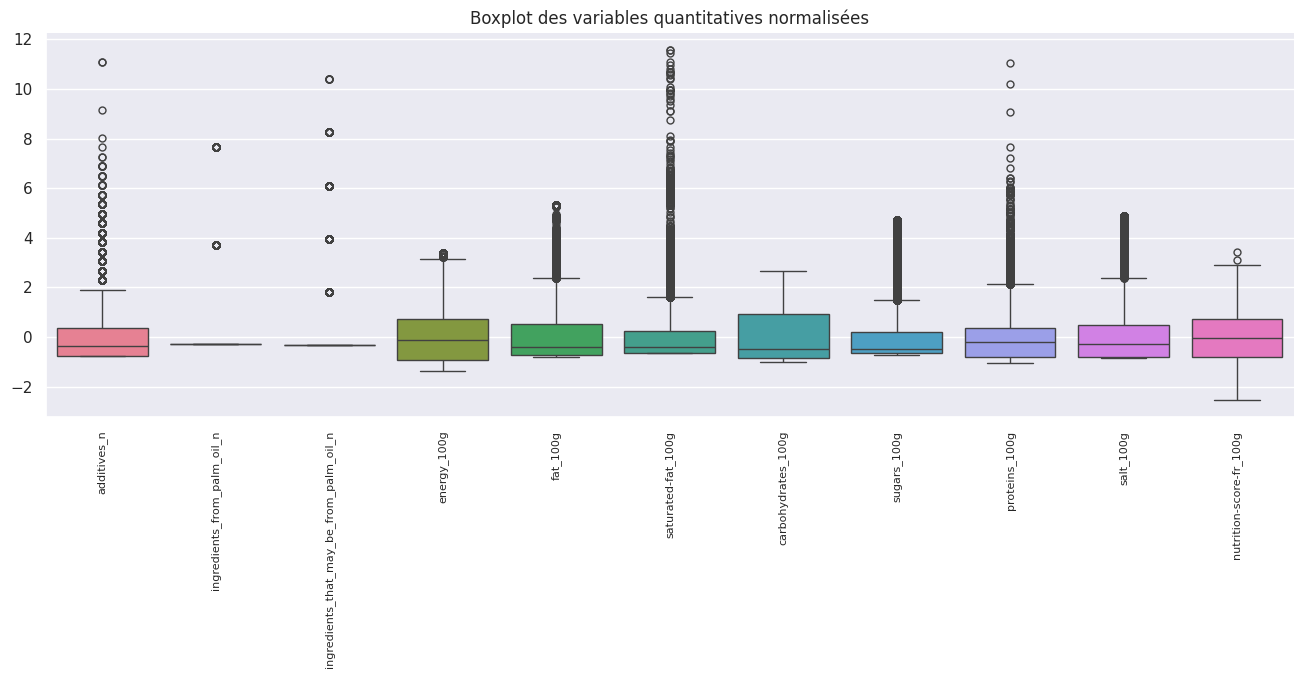

In [60]:
# Afficher un boxplot normalisé pour toutes les variables quantitatives

# Sélection des variables quantitatives
quantitative_data = subset_data[quantitative_variables]
# Normalisation des données
normalized_data = (quantitative_data - quantitative_data.mean()) / quantitative_data.std()
# Création du boxplot
sns.catplot(data=normalized_data, kind="box", height=4.5, aspect=3)
plt.title('Boxplot des variables quantitatives normalisées')
plt.xticks(rotation=90, fontsize=8)
plt.show()

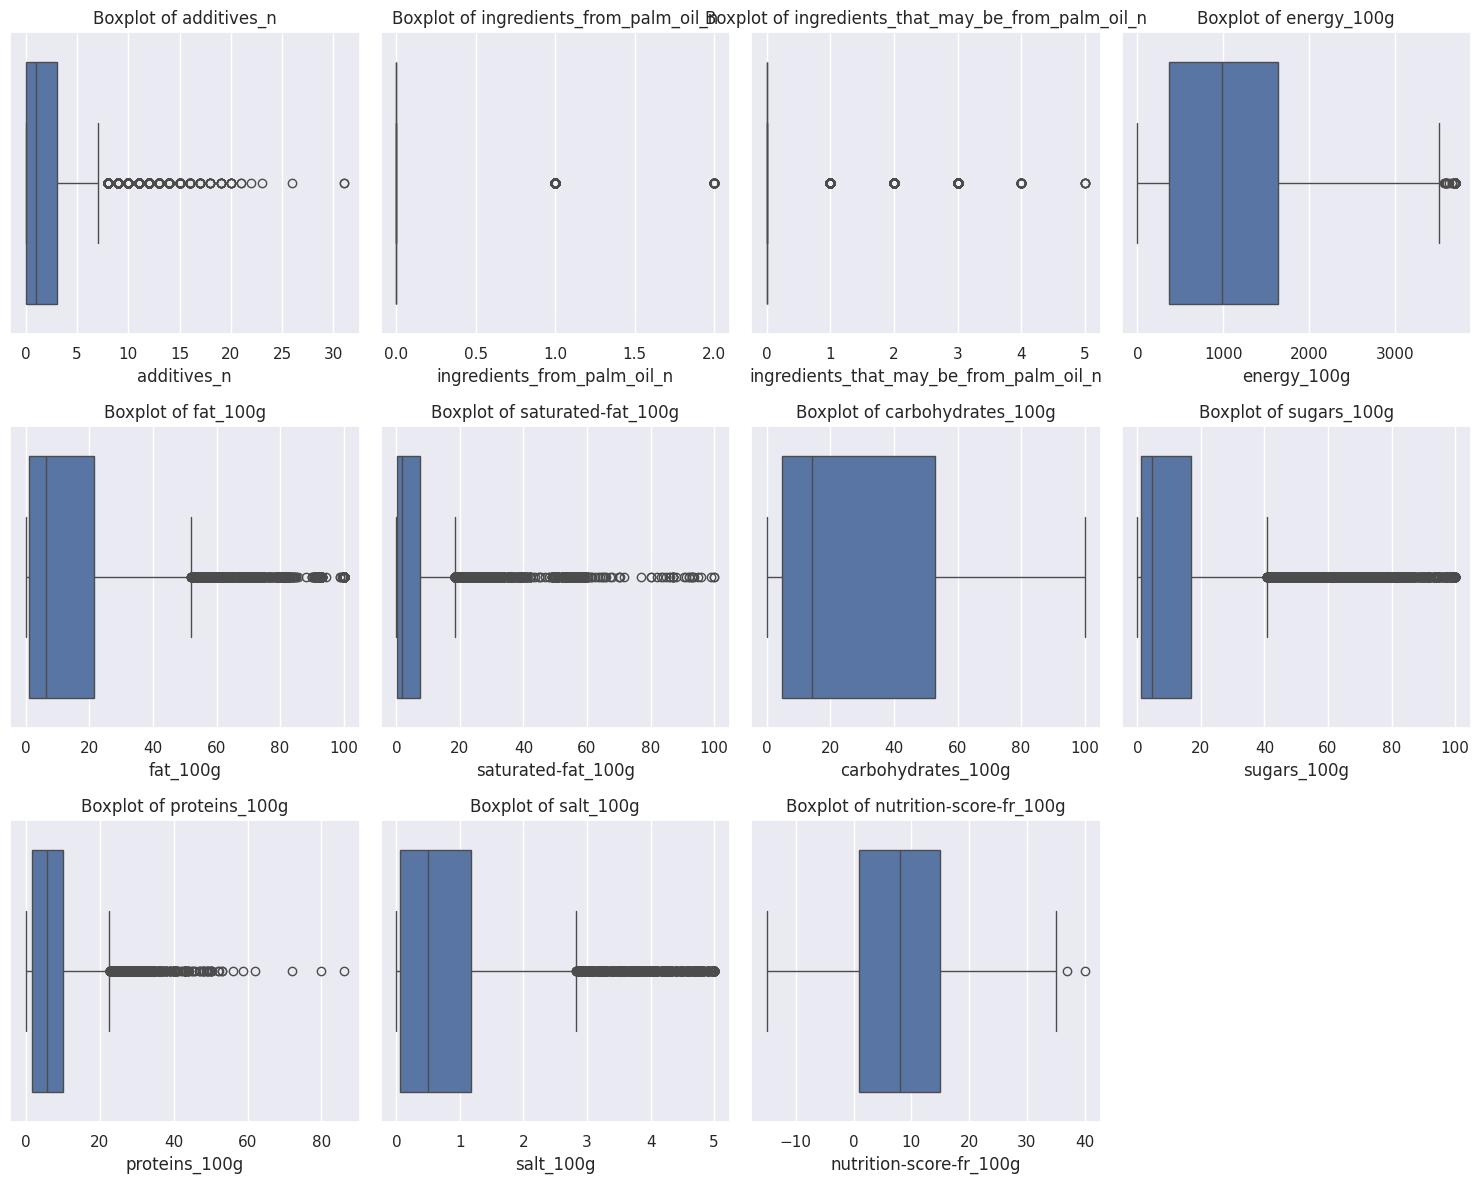

In [61]:
# Visualisation sous forme de mosaique de boxplots pour chaque variable quantitative avec seaborn

import matplotlib.pyplot as plt
import seaborn as sns

def plot_mosaic_boxplots(data, quantitative_variables):
  """
  Creates a mosaic of boxplots for each quantitative variable in the input data.

  Args:
    data: A pandas DataFrame containing the data.
    quantitative_variables: A list of column names representing quantitative variables.
  """

  num_plots = len(quantitative_variables)
  num_cols = 4  # Number of columns in the mosaic
  num_rows = (num_plots + num_cols - 1) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
  axes = axes.flatten()  # Flatten the axes array for easy iteration

  for i, variable in enumerate(quantitative_variables):
    sns.boxplot(x=data[variable], orient="y", ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

  # Hide any unused subplots
  for j in range(i + 1, len(axes)):
      axes[j].axis('off')

  plt.tight_layout()
  plt.show()

plot_mosaic_boxplots(subset_data, quantitative_variables)

Remarque : les outliers de notre jeu de données dépassent uniquement la limite haute, la limite basse étant zéro.

In [62]:
subset_data.shape

(51112, 14)

In [63]:
def find_outliers_iqr(data):
  """
  Recherche les outliers à l'aide de la méthode IQR.

  Args:
    data: A pandas Series.

  Returns:
    A DataFrame containing the outliers.
  """
  quantitative_variables = data.select_dtypes(include=['number']).columns.tolist()

  Q1 = data[quantitative_variables].quantile(0.25)
  Q3 = data[quantitative_variables].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # aligning the index of bounds with the data columns before comparison:
  lower_bound = lower_bound.reindex(data[quantitative_variables].columns) # reindex lower_bound
  upper_bound = upper_bound.reindex(data[quantitative_variables].columns) # reindex upper_bound
  outliers = data[quantitative_variables][(data[quantitative_variables] < lower_bound) | (data[quantitative_variables] > upper_bound)]
  outliers = data[quantitative_variables][(data[quantitative_variables] > upper_bound)]
  return outliers

In [64]:
outliers = find_outliers_iqr(subset_data)
print(outliers.shape)

(51112, 11)


In [65]:
def count_ouliers(df):
  """
  Afficher le nombre d'outliers pour chaque variable.

  args:
    - DataFrame
  return:
    - None
  """
  quantitative_variables = df.select_dtypes(include=['number']).columns.tolist()
  outliers = find_outliers_iqr(df)
  for col in quantitative_variables:
    print(f"{col} : {outliers[col].count()}")

In [66]:
count_ouliers(subset_data)

additives_n : 2075
ingredients_from_palm_oil_n : 2954
ingredients_that_may_be_from_palm_oil_n : 5421
energy_100g : 119
fat_100g : 1395
saturated-fat_100g : 3321
carbohydrates_100g : 0
sugars_100g : 5049
proteins_100g : 2416
salt_100g : 1540
nutrition-score-fr_100g : 2


#### Traitement des outliers

Une fois identifiés, il existe plusieurs stratégies pour traiter les outliers, en fonction du contexte et de la nature des données :

- **Suppression** : Retirer simplement les observations en dehors de la plage acceptable. Ssouvent pertinent lorsque les outliers sont des erreurs de saisie ou des valeurs extrêmement improbables.
- **Imputation** : Remplacer les outliers par la valeur la plus proche dans l'intervalle acceptable (par exemple, Q1 - 1.5 x IQR pour les valeurs inférieures ou Q3 + 1.5 x IQR pour les valeurs supérieures.

**Choix de la méthode adaptée**

Le choix de la méthode dépend du domaine, de l'objectif de l'analyse et du contexte des données :

- Si les outliers sont dus à des **erreurs de saisie**, il est souvent préférable de les supprimer.
- Si les outliers représentent des **valeurs rares mais valides**, les modéliser ou utiliser des transformations peut être plus adapté.

Traitement pour chaque variable quantitative :

- Ne rien faire
  - `additives_n`
  - `ingredients_from_palm_oil_n`
  - `ingredients_that_may_be_from_palm_oil_n`
  - `carbohydrates_100g`
- Suppression (car peu nombreux)
  -  `energy_100g`
  - `nutrition-score-fr_100g`
- Imputation
  - `fat_100g`
  - `saturated-fat_100g`
  - `sugars_100g`
  - `proteins_100g`
  - `salt_100g`


In [67]:
subset_data.shape

(51112, 14)

In [68]:
def remove_outliers_from_columns(df, cols):
  """
  Supprime les outliers des colonnes spécifiées d'un DataFrame à l'aide de la méthode IQR (en conservant les nans).

  Args:
    df: DataFrame.
    cols: Une liste de colonnes pour lesquelles les outliers doivent être supprimés.

  Returns:
    Un nouveau DataFrame avec les outliers supprimés.
  """
  df_no_outliers = df.copy()
  for col in cols:
    if pd.api.types.is_numeric_dtype(df[col]):
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound) | (df_no_outliers[col].isnull())]
  return df_no_outliers

In [69]:
subset_data_no_outliers = remove_outliers_from_columns(subset_data, ['energy_100g', 'nutrition-score-fr_100g'])

In [70]:
import math

def replace_outliers_with_nearest_value(df, cols):
    """
    Remplace les outliers dans une colonne d'un DataFrame par la valeur la plus proche dans l'intervalle acceptable,
    tout en conservant les valeurs NaN.

    Args:
        df: Le DataFrame d'entrée.
        column: Le nom de la colonne à traiter.

    Returns:
        Un nouveau DataFrame avec les outliers remplacés.
    """

    df_copy = df.copy()

    for column in cols:

      if not pd.api.types.is_numeric_dtype(df[column]):
          return df_copy  # Ne rien faire si la colonne n'est pas numérique

      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Identifier les outliers
      outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]

      # Remplacer les outliers
      for index, row in outliers.iterrows():
        if pd.isna(row[column]):
          continue # keep NaN values
        if row[column] < lower_bound:
            df_copy.loc[index, column] = math.ceil(lower_bound)
        elif row[column] > upper_bound:
            df_copy.loc[index, column] = math.floor(upper_bound)

    return df_copy

In [71]:
subset_data_no_outliers = replace_outliers_with_nearest_value(subset_data_no_outliers, ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g'])

In [72]:
subset_data_no_outliers.shape

(50991, 14)

In [73]:
count_ouliers(subset_data_no_outliers)

additives_n : 2074
ingredients_from_palm_oil_n : 2952
ingredients_that_may_be_from_palm_oil_n : 5420
energy_100g : 0
fat_100g : 0
saturated-fat_100g : 0
carbohydrates_100g : 0
sugars_100g : 0
proteins_100g : 0
salt_100g : 0
nutrition-score-fr_100g : 0


## Étape 3 : Identifiez et traitez les valeurs manquantes

Les valeurs manquantes dans un jeu de données posent problème pour l'analyse. Pour y remédier, on peut :

* **Supprimer** les lignes ou colonnes concernées (si le nombre de valeurs manquantes est faible).
* **Imputer** les valeurs manquantes (en utilisant la moyenne, la médiane, des méthodes plus sophistiquées comme l'imputation multiple, etc.).
* **Utiliser des modèles spécifiques** qui peuvent gérer les données manquantes (comme les forêts aléatoires ou XGBoost).


In [74]:
def missing_values_table(df):
  """
  Calcule le nombre et le pourcentage de valeurs manquantes pour chaque variable d'un DataFrame.

  Args:
    df: DataFrame pandas.

  Returns:
    DataFrame avec le nombre et le pourcentage de valeurs manquantes pour chaque variable.
  """
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'NaNs', 1 : 'Pourcent NaNs'})
  mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('Pourcent NaNs', ascending=False).round(1)
  return mis_val_table_ren_columns

missing_values_table(subset_data_no_outliers)

NaNs  Pourcent NaNs
additives_n                              5761           11.3
ingredients_from_palm_oil_n              5761           11.3
ingredients_that_may_be_from_palm_oil_n  5761           11.3
nutrition_grade_fr                       5727           11.2
nutrition-score-fr_100g                  5727           11.2
saturated-fat_100g                       4773            9.4
sugars_100g                              4569            9.0
salt_100g                                4430            8.7
carbohydrates_100g                       4253            8.3
fat_100g                                 4075            8.0
proteins_100g                            2109            4.1
energy_100g                              1667            3.3
pnns_groups_1                               0            0.0
main_category_fr                            0            0.0

### Imputation par la médiane

**Imputation par la médiane** de la catégorie `main_category_fr` pour les variables suivantes :

- `carbohydrates_100g`
- `sugars_100g`
- `proteins_100g`
- `fat_100g`
- `saturated-fat_100g`
- `salt_100g`
- `nutrition-score-fr_100g`

In [75]:
# Imputation par la médiane pour chaque catégorie de 'main_category_fr'
vars_imput_median = ['carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'salt_100g', 'nutrition-score-fr_100g']
for variable in vars_imput_median:
  subset_data_no_outliers[variable] = subset_data.groupby('main_category_fr')[variable].transform(lambda x: x.fillna(x.median()))

### Mise à 0 des variables terminant par `_n`

Ces variables compte le nombre d'ingrédients ou d'additifs. Nous considérons que si ces valeurs sont vides cela signifie une absence de ces ingrédients.

- `additives_n`
- `ingredients_from_palm_oil_n`
- `ingredients_that_may_be_from_palm_oil_n`

> Nous décidons de remplacer les valeurs vides par 0.

In [76]:
subset_data_no_outliers.loc[:,'additives_n'] = subset_data_no_outliers['additives_n'].fillna(0)
subset_data_no_outliers.loc[:,'ingredients_from_palm_oil_n'] = subset_data_no_outliers['ingredients_from_palm_oil_n'].fillna(0)
subset_data_no_outliers.loc[:,'ingredients_that_may_be_from_palm_oil_n'] = subset_data_no_outliers['ingredients_that_may_be_from_palm_oil_n'].fillna(0)

### Calcul de `energy_100g`

Nous pouvons **calculer l'energie à partir des macro-nutriments** : glucides, lipides, proteines.

Calculer le total calorique d'un aliment ou d'un repas à partir de ses macronutriments (glucides, lipides, protéines) est une opération courante en nutrition.

Les équivalences énergétiques à retenir :
- 1 gramme de glucides apporte environ 17 kilojoules (kJ).
- 1 gramme de protéines apporte environ 17 kilojoules (kJ).
- 1 gramme de lipides apporte environ 37 kilojoules (kJ).

La formule générale :
Pour calculer le total calorique en kJ d'un aliment ou d'un repas, il suffit d'appliquer la formule suivante :

> Total en kJ = (grammes de glucides x 17 kJ/g) + (grammes de protéines x 17 kJ/g) + (grammes de lipides x 37 kJ/g)

In [77]:
# Calculer l'energie et remplir les valeurs vides
def calculate_energy(carbs, proteins, fats):
  energy_kcals = (4 * carbs) + (4 * proteins) + (9 * fats)
  energy_kj = energy_kcals * 4.184
  return round(energy_kj, 1)

In [78]:
def calc_energy_100g_if_nan(df):
  """
  Cette fonction calcule la valeur de `energy_100g` à partir des macro-nutriments, si la valeur est manquante.

  Args :
    - DataFrame
  """
  # Apply calcul_energy to create a new column 'calculated_energy_100g'
  df['calculated_energy_100g'] = df.apply(lambda row: calculate_energy(row['carbohydrates_100g'], row['proteins_100g'], row['fat_100g']), axis=1)
  # Remplacez les valeurs manquantes de 'energy_100g' par les valeurs calculées
  df['energy_100g'] = df['energy_100g'].fillna(df['calculated_energy_100g'])
  # Supprimez la colonne 'predicted_energy_100g' si vous ne souhaitez pas la conserver
  df.drop('calculated_energy_100g', axis=1, inplace=True)

  return df

In [79]:
subset_data = calc_energy_100g_if_nan(subset_data_no_outliers)

### Suppression

> Nous décidons de supprimer les lignes restantes qui ne contienne que des NaNs

In [82]:
subset_data_no_outliers.shape

(50991, 14)

In [83]:
# Compter les lignes contenant des NaNs

def count_rows_with_nans(df):
  """Counts the number of rows containing at least one NaN value in a DataFrame.

  Args:
    df: The pandas DataFrame to check.

  Returns:
    The number of rows with NaNs.
  """
  return df.isnull().any(axis=1).sum()

# Example usage:
num_rows_with_nans = count_rows_with_nans(subset_data_no_outliers)
print(f"Number of rows with NaNs: {num_rows_with_nans}")

Number of rows with NaNs: 5727


In [84]:
subset_data_clean = subset_data_no_outliers.dropna()

### Bilan valeurs manquantes

In [85]:
subset_data_clean.shape

(45264, 14)

In [86]:
missing_values_table(subset_data_clean)

NaNs  Pourcent NaNs
pnns_groups_1                               0            0.0
main_category_fr                            0            0.0
nutrition_grade_fr                          0            0.0
additives_n                                 0            0.0
ingredients_from_palm_oil_n                 0            0.0
ingredients_that_may_be_from_palm_oil_n     0            0.0
energy_100g                                 0            0.0
fat_100g                                    0            0.0
saturated-fat_100g                          0            0.0
carbohydrates_100g                          0            0.0
sugars_100g                                 0            0.0
proteins_100g                               0            0.0
salt_100g                                   0            0.0
nutrition-score-fr_100g                     0            0.0

## Étape 4 : Effectuez les analyses uni-variées et bi-variées

### Analyses uni-variées

L'analyse univariée est une méthode statistique qui examine une seule variable à la fois, dans le but de résumer et comprendre ses principales caractéristiques. Voici un court résumé des principaux aspects de l'analyse univariée :

1. **Objectif** :
   - Comprendre la distribution d'une variable isolée, en analysant ses tendances centrales, sa dispersion et sa forme.
   - Identifier les anomalies, les valeurs extrêmes, et vérifier la normalité de la distribution si nécessaire.

2. **Mesures de tendance centrale** :
   - **Moyenne** : Représente la valeur moyenne de la variable.
   - **Médiane** : Milieu de la distribution, divise les données en deux parties égales.
   - **Mode** : Valeur la plus fréquente.

3. **Mesures de dispersion** :
   - **Écart-type** : Mesure la variabilité des données par rapport à la moyenne.
   - **Variance** : Dispersion moyenne des données autour de la moyenne.
   - **Étendue (range)** : Différence entre la valeur maximale et la valeur minimale.
   - **Quartiles** et **IQR (interquartile range)** : Mesures pour analyser la distribution par segments.

4. **Forme de la distribution** :
   - **Asymétrie (skewness)** : Indique si la distribution est symétrique ou biaisée à gauche/droite.
   - **Aplatissement (kurtosis)** : Indique si la distribution est plus ou moins étalée que la courbe normale.

5. **Représentations graphiques** :
   - **Histogramme** : Pour visualiser la distribution d'une variable.
   - **Boxplot** : Pour repérer les valeurs aberrantes et visualiser les quartiles.
   - **Diagramme en bâtons** : Pour les variables discrètes.

L'analyse univariée est une première étape essentielle avant de passer à des analyses plus complexes, car elle permet de comprendre la nature d'une variable et de poser des hypothèses sur ses relations potentielles avec d'autres variables.

#### Variables qualitatives

##### Distribution de la cible `pnns_groups_1`

In [87]:
# Graphique de répartition des modalités de `pnns_groups_1`
pnns_groups_counts = subset_data_clean['pnns_groups_1'].value_counts().sort_values(ascending=False)
# Créer le graphique
fig = px.bar(
    pnns_groups_counts,
    x=pnns_groups_counts.index,
    y=pnns_groups_counts.values,
    title='Répartition des pnns_groups_1',
    labels={'x': 'pnns_groups_1', 'y': 'Nombre d\'occurrences'},
)
# Show the chart
fig.show()

*Interprétation* : Ce diagramme en baton nous montre la distribution des aliments pour chaque modalité de `pnns_groups_1`.

In [88]:
# Afficher la répartition des modalités de 'nutrition_grade_fr' avec un graphique
fig = px.histogram(subset_data_clean, x='nutrition_grade_fr', title='Répartition des notes nutritionnelles')
fig.update_layout(xaxis_title='Note nutritionnelle', yaxis_title='Nombre de produits')
fig.update_xaxes(categoryorder='total descending')
fig.show()

##### `nutrition_grade_fr`

*Interprétation* : Ce diagramme en bâton montre que la distribution des notes nutritionnelles n'est pas uniforme. On observe une forte concentration de produits avec une note 'd', suivi de 'c' et 'e'. Les notes 'a' et 'b' sont moins représentées, ce qui suggère que la majorité des produits dans le dataset sont de moins bonne qualité nutritionnelle.

 ##### `main_category_fr`

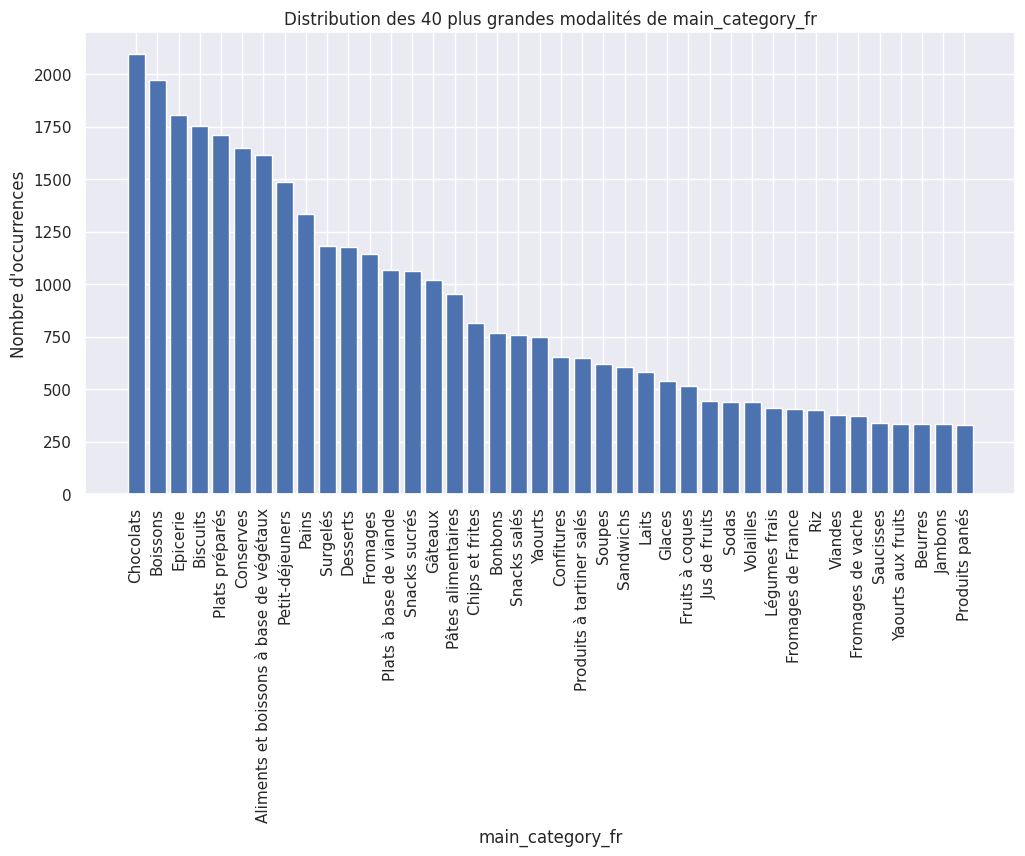

In [89]:
# Distribution des 40 plus grosse modalités de main_category_fr

# Calculer le nombre d'occurrences de chaque modalité de 'main_category_fr'
main_category_counts = subset_data_clean['main_category_fr'].value_counts()

# Sélectionner les 20 plus grandes modalités
top_40_main_categories = main_category_counts[:40]

# Créer un graphique de distribution des 20 plus grandes modalités
plt.figure(figsize=(12, 6))
plt.bar(top_40_main_categories.index, top_40_main_categories.values)
plt.title('Distribution des 40 plus grandes modalités de main_category_fr')
plt.xlabel('main_category_fr')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=90)
plt.show()

*Interprétation* : Ici, nous visualison la distribution des 40 plus grandes modalités de `main_category_fr`. La catégorie contenant le plus de produits est "Chocolats", suivi de "Boissons" et ""Epicerie.

#### Variables quantitatives

> La fonction `describe()` nous permet de visualiser tous les indicateurs statistiques de nos variables quantitatives.

In [90]:
subset_data_clean.describe()

additives_n  ingredients_from_palm_oil_n  \
count      45264.0                      45264.0   
mean      1.789877                     0.059738   
std       2.520983                     0.240429   
min            0.0                          0.0   
25%            0.0                          0.0   
50%            1.0                          0.0   
75%            3.0                          0.0   
max           31.0                          2.0   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                                  45264.0  45264.000000  45264.000000   
mean                                  0.136223   1085.000554     12.776546   
std                                   0.438167    766.838673     15.715417   
min                                        0.0      0.000000      0.000000   
25%                                        0.0    385.750000      1.000000   
50%                                        0.0    997.000000      6.300000   
75%                                        0.0   1658.000000     21.000000   
max                                        5.0   3510.000000    100.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g  proteins_100g  \
count        45264.000000        45264.000000  45264.000000   45264.000000   
mean             5.296996           27.733802     13.255251       7.367780   
std              7.981378           26.842184     18.290653       7.054752   
min              0.000000            0.000000      0.000000       0.000000   
25%              0.200000            4.760000      1.200000       1.700000   
50%              1.900000           14.500000      4.500000       5.900000   
75%              7.400000           53.000000     17.000000      10.000000   
max             93.000000          100.000000    100.000000      86.000000   

          salt_100g  nutrition-score-fr_100g  
count  45264.000000             45264.000000  
mean       0.752765                 8.317559  
std        0.865995                 9.198791  
min        0.000000               -15.000000  
25%        0.070000                 1.000000  
50%        0.500000                 8.000000  
75%        1.180000                15.000000  
max        5.000000                35.000000

Visualisation de la distribution de toutes les variables quantitatives avec matplotlib

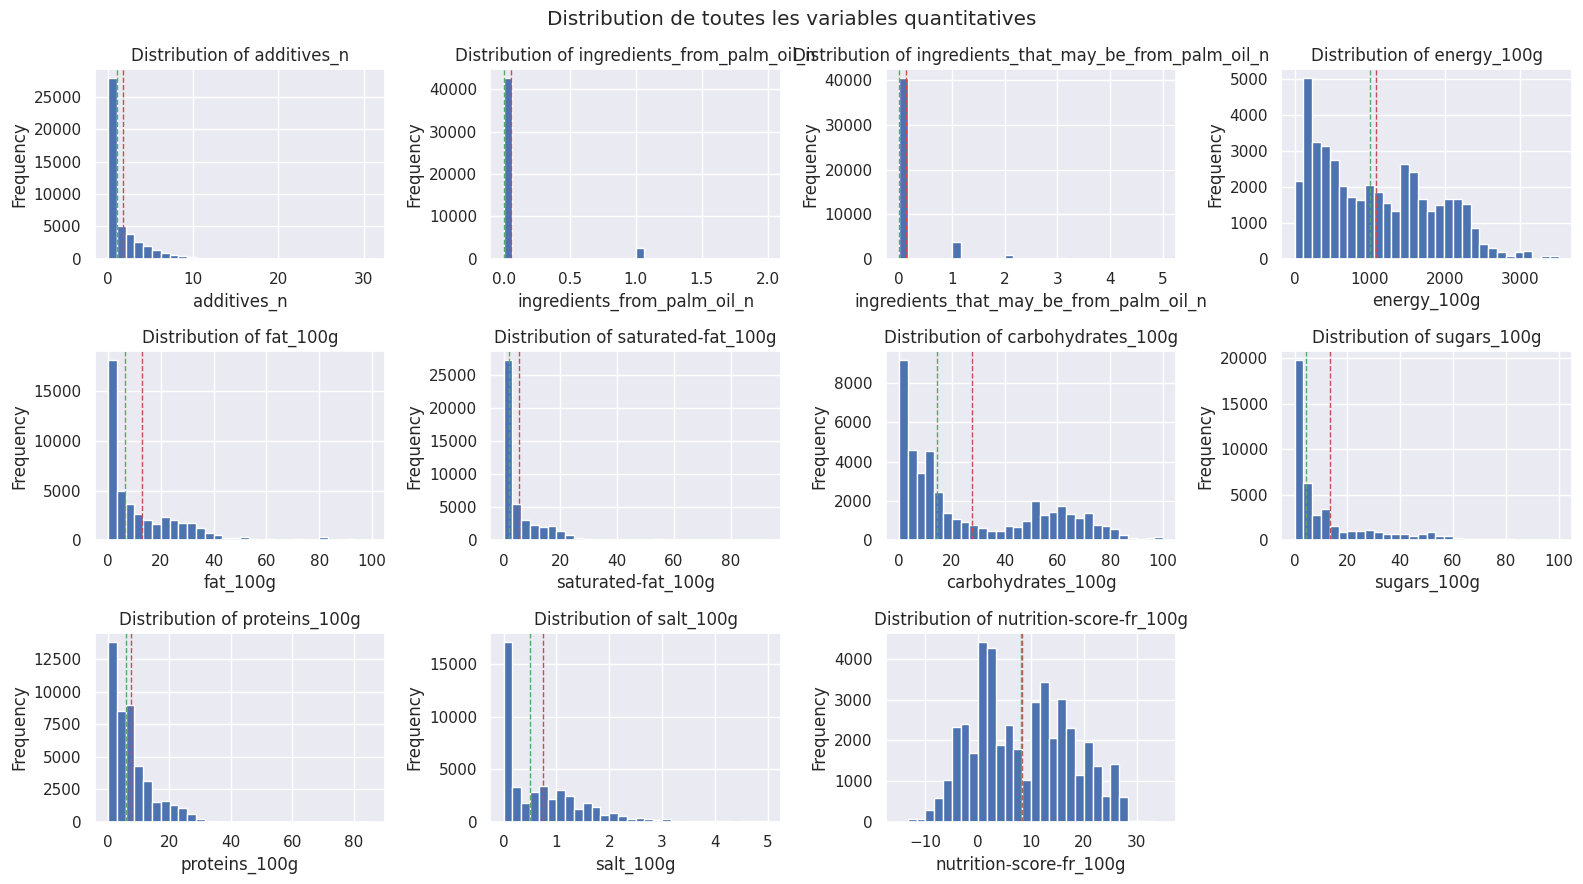

In [91]:
def plot_quantitative_distributions(df, quantitative_vars):
  """
  Visualisation de la distribution de toutes les variables quantitatives avec matplotlib.
  """
  num_vars = len(quantitative_vars)
  num_cols = 4  # Adjust number of columns as needed
  num_rows = (num_vars + num_cols - 1) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))
  axes = axes.ravel()  # Flatten the axes array

  for i, var in enumerate(quantitative_vars):
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].hist(df[var], bins=30)
    axes[i].axvline(mean_val, color='r', linestyle='dashed', linewidth=1)
    axes[i].axvline(median_val, color='g', linestyle='dashed', linewidth=1)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

  # Hide any unused subplots
  for j in range(i + 1, len(axes)):
    axes[j].axis('off')

  plt.suptitle("Distribution de toutes les variables quantitatives")
  plt.tight_layout()
  plt.show()


# quantitative_variables = ['energy_100g', 'nutrition-score-fr_100g', 'additives_n',
#                           'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
#                           'fat_100g', 'saturated-fat_100g', 'salt_100g']

plot_quantitative_distributions(subset_data_clean, quantitative_variables)


*Interprétation des indicateurs statistiques* :

- **Énergie** : Les aliments contiennent en moyenne **1089 kJ/100g**, avec un écart-type de **773 kJ/100g**, ce qui souligne une **grande variabilité** dans la densité énergétique des produits. Les valeurs vont de **0 kJ** à **3700 kJ**, montrant qu'il y a des aliments très peu caloriques et d'autres extrêmement riches en énergie.
  
- **Lipides** : En moyenne, les aliments contiennent **12,9 g/100g** de lipides, dont **5,3 g/100g** de graisses saturées. L'écart-type pour les lipides est de **16,1 g/100g**, révélant une **dispersion importante** des graisses totales. Certains produits peuvent avoir **jusqu'à 100 g/100g** de graisses et de graisses saturées (comme l'huile).

- **Glucides** : La moyenne est de **27,7 g/100g** de glucides, dont **13,2 g/100g** de sucres. L'écart-type de **26,8 g/100g** indique que la teneur en glucides varie beaucoup selon les aliments. Certains contiennent jusqu’à **100 g/100g** de glucides et de sucres (comme le sucre blanc).

- **Protéines** : Les aliments contiennent en moyenne **7,4 g/100g** de protéines avec un écart-type de **7 g/100g**. Bien que la plupart des aliments aient des niveaux modérés de protéines, certains atteignent des valeurs aussi élevées que **86 g/100g**.

- **Sel** : La teneur moyenne en sel est de **750 mg/100g**, mais elle présente une grande variabilité, avec un écart-type de **866 mg/100g**. Les produits peuvent varier de **0 g/100g** à **5 g/100g** de sel, reflétant des différences notables dans les niveaux de salinité.

- **Score nutritionnel (Nutri-Score FR)** : Le score nutritionnel moyen est de **8,3**, avec un écart-type de **9,19**. Ce score peut varier de **-15**, suggérant des aliments très sains, à **40**, indiquant des produits de faible qualité nutritionnelle.

- **Additifs et huile de palme** : La médiane indique que **50 %** des aliments contiennent **environ 1 additif**, avec une variabilité allant de **0** à **31 additifs** par produit. Concernant l'huile de palme, la médiane est de **0** pour les deux catégories (huile de palme confirmée ou potentielle), ce qui montre que l'huile de palme est **rarement utilisée** dans la majorité des produits.


**Ecart-types**

Nous remarquons que les écart-types de ces variables sont très grands (comparativement à la moyenne), ce qui indique une grande dispersion dans les données. Plus l'écart-type est grand par rapport à la moyenne, plus la variabilité est significative, et il devient crucial de le prendre en compte dans l’analyse.

**Ecarts entre moyennes et médianes**

On remarque également des écarts importants entre les moyennes et les médianes pour **les lipides, les graisses saturées, les glucides, les sucres et les protéines** (dans une moindre mesure). Un écart important entre la moyenne et la médiane est souvent le signe que la distribution des données est asymétrique (non symétrique).

La moyenne et la médiane sont des mesures de tendance centrale qui peuvent être affectées différemment selon la forme de la distribution des données.

Lorsque la moyenne est supérieure à la médiane, cela suggère que la distribution des données est **asymétrique à droite**, également appelée asymétrie positive. Cela signifie qu'il y a des valeurs extrêmement élevées (ou des outliers) qui tirent la moyenne vers le haut.

**Remarques**

Les indicateurs statistiques présentés sont **trop généraux pour fournir une analyse nutritionnelle précise** des aliments. Une approche plus détaillée, tenant compte de la **catégorie** et de la nature spécifique des aliments, est indispensable pour une interprétation plus pertinente. **C'est l'objectif des analyses bi-variées**.

---

### Analyses bi-variées

Une analyse bi-variée consiste à **examiner la relation entre deux variables**. Elle permet de comprendre si et comment ces variables sont liées entre elles, souvent pour vérifier une hypothèse ou pour explorer des tendances dans les données.

Ces analyses sont cruciales pour identifier des variables influentes et orienter les décisions basées sur les données.

Documentation :

- Pour plus de détails : [OpenClassrooms - Analyse Bivariée](https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7428247-comprenez-les-enjeux-de-l-analyse-bivariee)
- https://seaborn.pydata.org/tutorial/introduction.html

#### Variables qualitatives

Pour deux variables qualitatives, on cherche à examiner si elles sont indépendantes ou liées l'une à l'autre.

- **Tableau de contingence** : Présente les effectifs croisés entre les catégories des deux variables.
- **Test du Chi-carré** : Permet de tester l'indépendance entre deux variables qualitatives.

> Nous décidons d'étudier la relation entre deux variables qualitatives `pnns_groups_1` et `nutrition_grade_fr`.

##### Tableau de contingence

Un tableau de contingence est un outil statistique permettant de visualiser la relation entre **deux variables qualitatives** en présentant la fréquence de chaque combinaison possible.

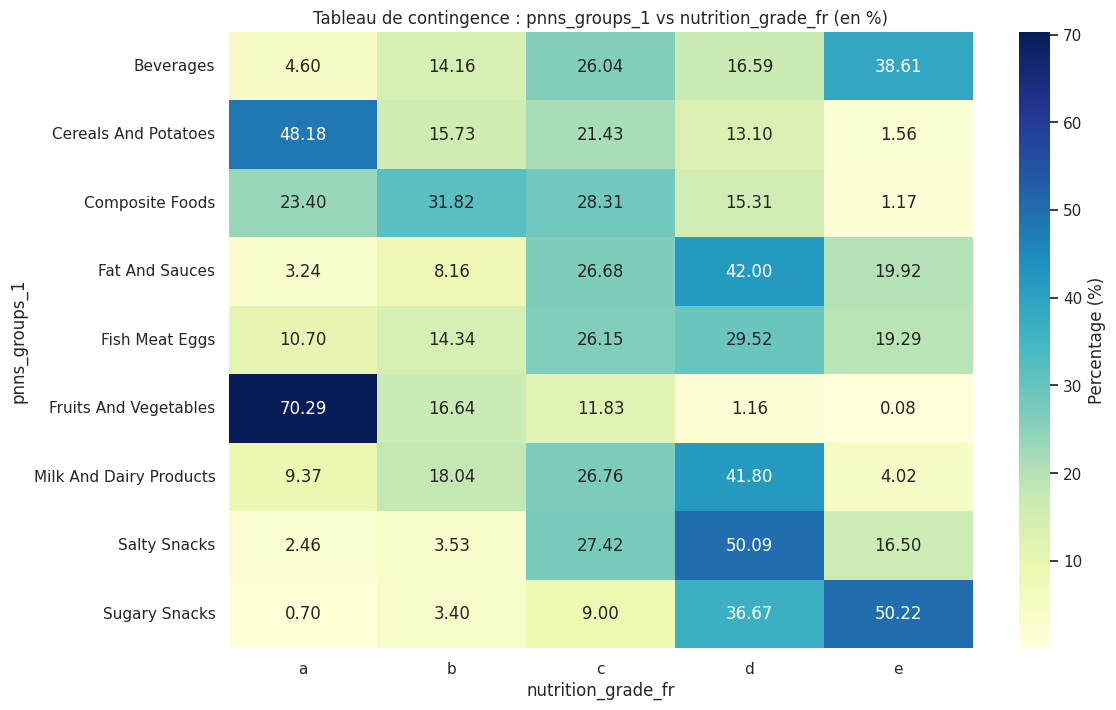

In [131]:
def contingency_tables(df, col1, col2, annot: bool = True):
  """
  Crée un tableau de contingence entre deux colonnes qualitatives d'un DataFrame.

  Args:
    df: Le DataFrame d'entrée.
    col1: Le nom de la première colonne.
    col2: Le nom de la deuxième colonne.

  Returns:
    Un tableau de contingence
  """
  contingency_table = pd.crosstab(df[col1], df[col2])
  # Tableau de contingence en fréquence (%)
  contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

  # Afficher le tableau de contingence en fréquence (%)
  plt.figure(figsize=(12, 8))
  if annot:
    sns.heatmap(contingency_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
  else:
    sns.heatmap(contingency_table_percentage, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
  plt.title(f"Tableau de contingence : {col1} vs {col2} (en %)")
  plt.xlabel(col2)
  plt.ylabel(col1)
  plt.show()
  return contingency_table, contingency_table_percentage

contingency_table_ngf, contingency_table_percentage_ngf = contingency_tables(subset_data_clean, 'pnns_groups_1', 'nutrition_grade_fr')


Ce tableau de contingence présente les **catégories alimentaires** (en ligne) par rapport à leur **note nutritionnelle** (en colonne, de **a** à **e**).

Pour les "Beverages", la majorité obtient une note **e** (38,61 %), alors que les "Fruits and Vegetables" sont majoritairement classés **a** (70,29 %), ce qui correspond à une meilleure qualité nutritionnelle.

On remarque également que les "Sugary Snacks" sont en grande majorité notés **d** ou **e**, indiquant une faible qualité nutritionnelle.

> *Interpétation* : Ce tableau permet de repérer des tendances dans la répartition nutritionnelle des catégories alimentaires.

##### Test du chi-2

Le **test du Chi-2** est une méthode statistique utilisée pour déterminer si deux variables qualitatives sont indépendantes ou liées. Il compare les fréquences observées dans un tableau de contingence (celles que l'on voit dans les données) aux fréquences attendues (celles que l'on s'attendrait à voir si les variables étaient indépendantes).

La statistique de **Chi-2** (χ²) mesure l'écart entre les valeurs observées et attendues : plus cette valeur est élevée, plus il est probable qu'il y ait une relation entre les variables.

La **p-value** indique la probabilité de voir cet écart par hasard. Si elle est inférieure au seuil de significativité (souvent 0,05), on rejette l'hypothèse d'indépendance et conclut que les variables sont associées.

In [132]:
# Test du chi-2 entre pnns_groups_1 et nutrition_grade_fr
def test_chi_2(contingency_table):
  """
  Effectue un test du Chi-2 entre deux variables qualitatives.

  Args:
    contingency_table: Le tableau de contingence entre les deux variables.
  """
  chi2, p, dof, expected = st.chi2_contingency(contingency_table)
  print(f"Chi-carré : {chi2}")
  print(f"P-value : {p}")
  print(f"Degrees of freedom : {dof}")
  return chi2, p, dof

In [133]:
chi2, p, dof = test_chi_2(contingency_table_ngf)

Chi-carré : 27558.05481454747
P-value : 0.0
Degrees of freedom : 32


- **Chi-carré** : La statistique de Chi-carré est ici de 27558, ce qui est très élevé. Cela suggère un grand écart entre les fréquences observées et attendues, indiquant une probable association forte entre `pnns_groups_1` et `nutrition_grade_fr`.
- **P-value** : La p-value est de 0,0 (arrondie ici à cause de la précision), ce qui signifie qu'il est pratiquement impossible d'obtenir un tel écart par hasard si les deux variables étaient indépendantes. Cette p-value, bien en dessous de 0,05, nous amène à rejeter l'hypothèse d'indépendance.

> *Interprétation* : On peut conclure que les variables `pnns_groups_1` et `nutrition_grade_fr` sont significativement associées, avec une probabilité extrêmement faible que cette relation soit due au hasard. **Il y a probablement une réelle influence des groupes alimentaires sur les notes nutritionnelles**.

##### `pnns_groups_1` et `main_category_fr`


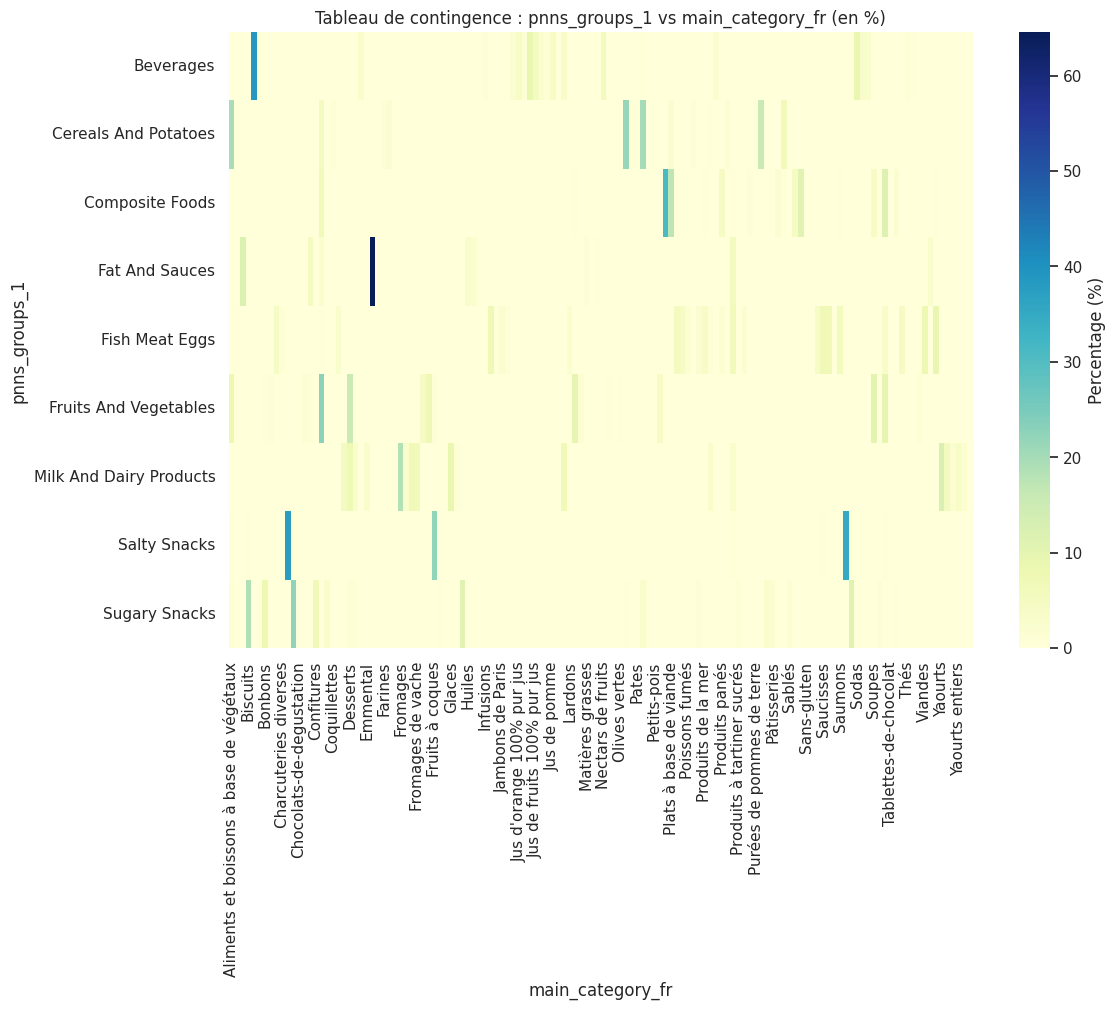

In [135]:
contingency_table_mcf, contingency_table_percentage_mcf = contingency_tables(subset_data_clean, 'pnns_groups_1', 'main_category_fr', annot=False)

In [129]:
chi2, p, dof = test_chi_2(contingency_table_mcf)

Chi-carré : 304337.0737971652
P-value : 0.0
Degrees of freedom : 1048


#### Variables quantitatives

Pour deux variables quantitatives, on cherche généralement à mesurer la force et la direction de leur association, c’est-à-dire si elles varient ensemble de manière positive, négative, ou indépendante.

- **Nuage de points (scatter plot)** : Permet de visualiser la relation et de repérer la tendance.
- **Graphique de densité** : Pour voir où se concentrent les valeurs de chaque variable.
- **Coefficient de corrélation de Pearson** : Mesure la force et la direction de la relation linéaire entre deux variables quantitatives (valeurs entre -1 et 1).
- **Matrice de corrélation** : Affiche les liens linéaires entre plusieurs variables quantitatives, avec chaque case montrant le coefficient de corrélation entre deux variables.


##### Matrice de corrélation

Une matrice de corrélation est un tableau qui affiche les liens linéaires entre plusieurs variables quantitatives, avec chaque case montrant le coefficient de corrélation entre deux variables. Chaque case de ce tableau indique le **coefficient de corrélation** entre deux variables, c'est-à-dire l'intensité et le sens de leur lien. En d'autres termes, elle nous montre à quel point les variables sont liées les unes aux autres.

En tenant compte de la **multicolinéarité** et **en choisissant le bon algorithme de classification**, nous serons en mesure de développer un modèle capable de prédire avec précision la catégorie d'un aliment.

**Le problème des variables quantitatives sont fortement corrélées** :

Si deux variables quantitatives sont fortement corrélées, elles apportent potentiellement la même information. Inclure les deux dans notre modèle pourrait entraîner des problèmes de **multicolinéarité** et réduire la précision de vos prédictions.

- **Multicolinéarité** : La multicolinéarité rend l'interprétation des coefficients du modèle difficile et peut augmenter la variance des estimations.
- **Instabilité du modèle** : Les petits changements dans les données peuvent entraîner de grandes variations dans les coefficients du modèle.
- **Diminution de la précision** : Dans certains cas, la multicolinéarité peut réduire la capacité du modèle à généraliser à de nouvelles données.


In [94]:
def correlation_matrix(df):
  """
  Affiche une matrice de corrélation pour les variables quantitatives d'un DataFrame.

  Args:
    df: Le DataFrame d'entrée.
  """
  quantitative_cols = df.select_dtypes(include=['number']).columns
  if len(quantitative_cols) == 0:
    print("No quantitative variables found in the DataFrame.")
    return

  correlation_matrix = df[quantitative_cols].corr()
  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Quantitative Variables')
  plt.show()

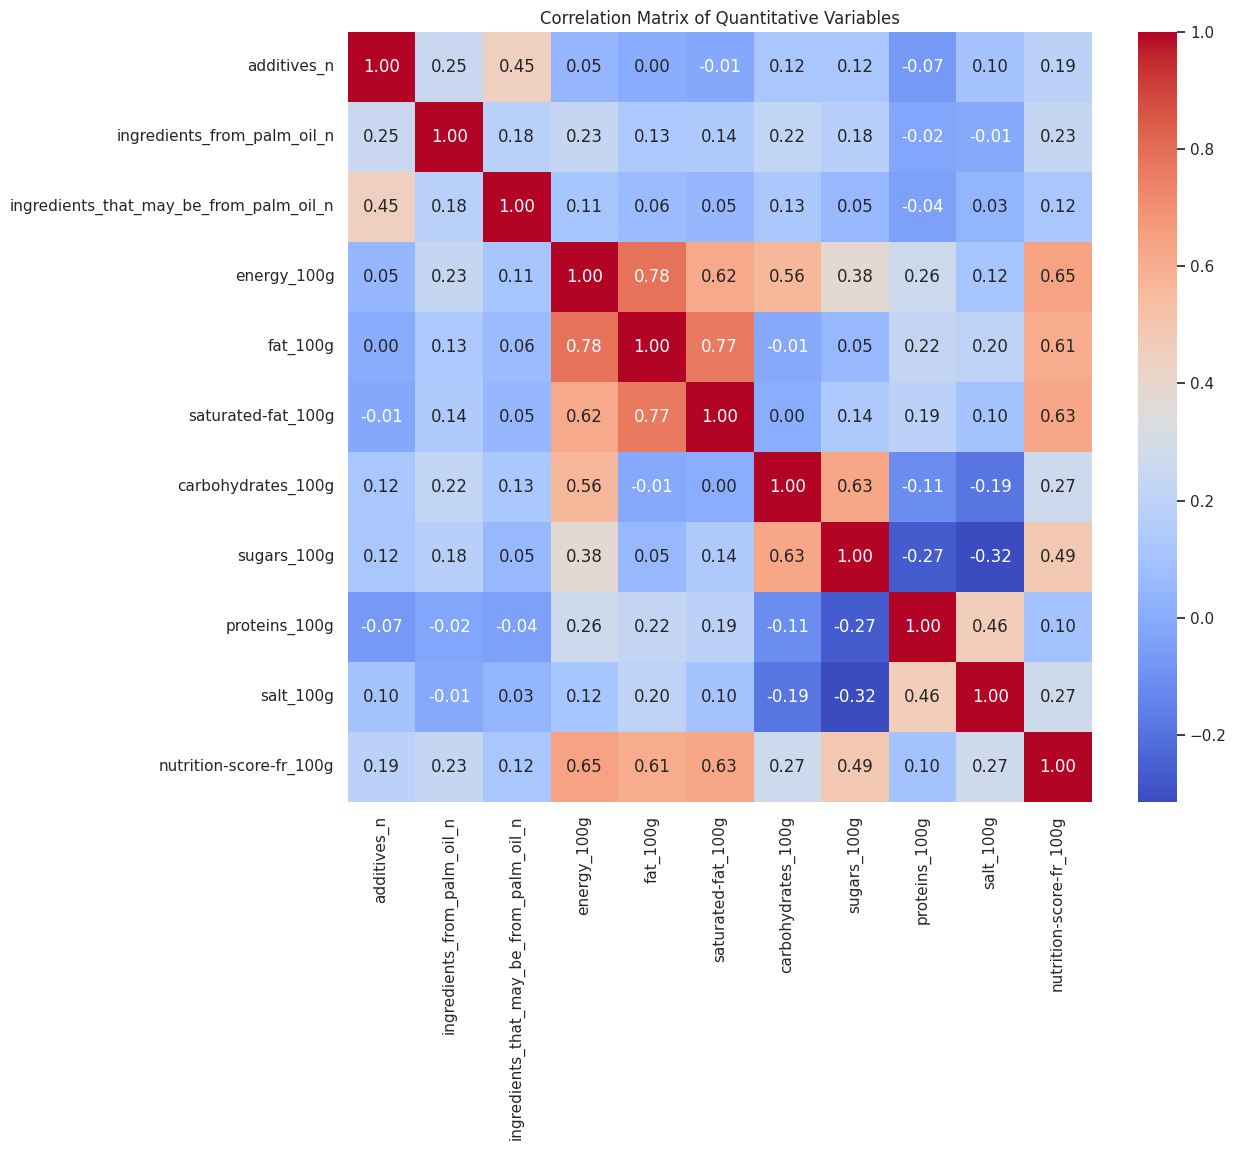

In [95]:
correlation_matrix(subset_data_clean)

##### Variables à considérer avec précaution:

Pour identifier les variables pouvant poser des problèmes de multicolinéarité, nous devons repérer les paires de variables avec des coefficients de corrélation élevés (proches de 1 ou -1). Ces fortes corrélations indiquent une redondance de l'information entre les variables, ce qui peut entraîner des problèmes de multicolinéarité dans un modèle de prédiction.

D'après cette matrice de corrélation, voici les paires de variables avec des corrélations élevées qui pourraient poser des problèmes :

1. **Énergie (`energy_100g`)** et **Lipides (`fat_100g`)** : corrélation de **0.78**
2. **Lipides (`fat_100g`)** et **Acides gras saturés (`saturated-fat_100g`)** : corrélation de **0.77**
3. **Énergie (`energy_100g`)** et **Acides gras saturés (`saturated-fat_100g`)** : corrélation de **0.62**
4. **Sucres (`sugars_100g`)** et **Glucides (`carbohydrates_100g`)** : corrélation de **0.63**
5. **Score nutritionnel (`nutrition-score-fr_100g`)** avec :
   - **Énergie (`energy_100g`)** : corrélation de **0.65**
   - **Lipides (`fat_100g`)** : corrélation de **0.61**
   - **Acides gras saturés (`saturated-fat_100g`)** : corrélation de **0.63**

Ces paires sont fortement corrélées, ce qui signifie qu'**inclure les deux variables dans un modèle pourrait entraîner une multicolinéarit**é, diminuant la stabilité et la précision du modèle.

> *Recommandations* : Il serait donc judicieux de réduire ces redondances, par exemple en **sélectionnant une seule variable de chaque paire** ou en sélectionnant un algorithme peu sensible aux colinéarités (Arbres de décisions, XGBoost, ...).

#### Variables quantitatives et qualitatives

Pour une variable qualitative et une variable quantitative, on cherche souvent à voir si les catégories de la variable qualitative influencent la distribution de la variable quantitative.

- **Boîte à moustaches (boxplot)** : Affiche la répartition des valeurs quantitatives pour chaque catégorie de la variable qualitative.
- **Diagramme de densité** : Montre la distribution de la variable quantitative pour chaque catégorie de la variable qualitative.
- **ANOVA (Analyse de la variance)** : Compare les moyennes de la variable quantitative entre les différentes catégories de la variable qualitative.

##### Relation entre `pnns_groups_1` et `energy_100g`

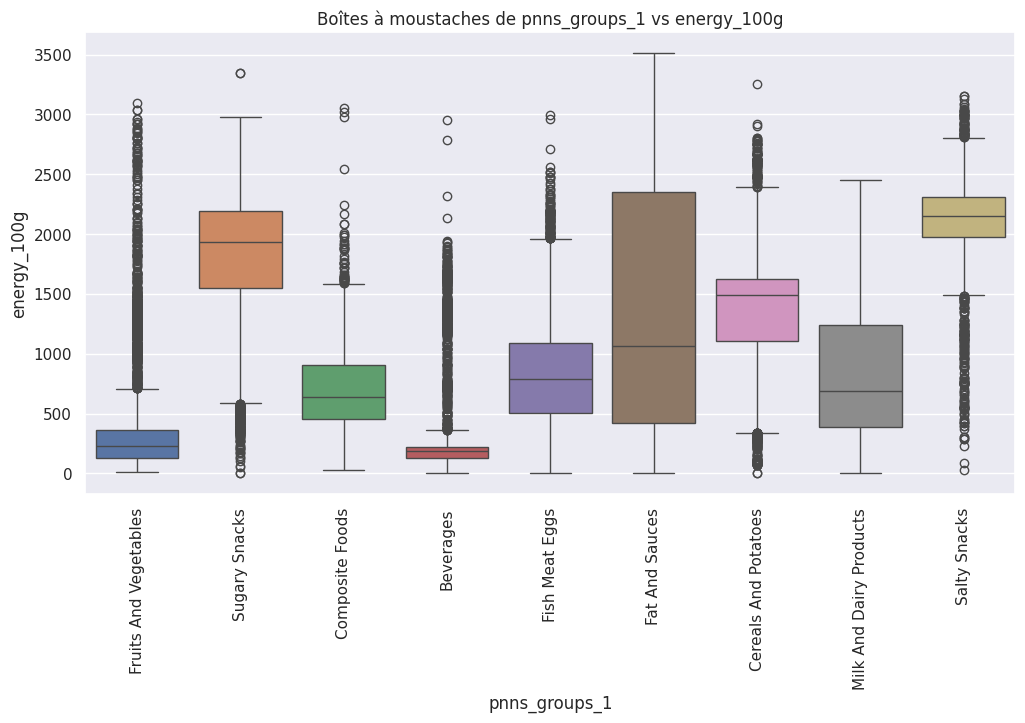

In [96]:
# Visualisation de la relation entre energy_100g et pnns_groups_1 avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_data_clean, x='pnns_groups_1', y='energy_100g', hue='pnns_groups_1', legend=False)
plt.xticks(rotation=90)
plt.title('Boîtes à moustaches de pnns_groups_1 vs energy_100g')
plt.xlabel('pnns_groups_1')
plt.ylabel('energy_100g')
plt.show()

*Interprétation*

Le graphique montre que certains groupes d'aliments ont des distributions énergétiques distinctes. Par exemple, les groupes "Fruits And Vegetables" et "Beverages" ont des niveaux d'énergie assez faibles, tandis que les groupes "Fat And Sauces" et "Sugary Snacks" ont des niveaux d'énergie plus élevés. Cette variation suggère que **l'énergie pourrait aider à distinguer certains groupes**.

Si certains groupes d'aliments ont des plages d'énergie qui se chevauchent peu (ou pas du tout) avec d'autres groupes, alors l'énergie pourrait être un indicateur fort. Par contre, pour des groupes comme "Composite Foods" et "Sugary Snacks" qui ont des plages d'énergie très larges et qui se chevauchent avec d'autres groupes, l'énergie seule sera moins discriminante.

> Dans un modèle de machine learning, **l’énergie pourrait ne pas être la seule variable utile mais pourrait apporter de l'information supplémentaire en combinaison avec d'autres variables**.



###### ANOVA

L'**analyse de la variance (ANOVA)** est une méthode statistique utilisée pour tester si les moyennes d'une variable quantitative diffèrent significativement entre les niveaux d'une variable qualitative.

L'ANOVA se base sur la **décomposition de la variance totale** de la variable quantitative en deux composants :
1. **Variance inter-groupes** : correspond à la variabilité due aux différences entre les groupes. Elle mesure dans quelle mesure les moyennes des groupes diffèrent de la moyenne globale.
2. **Variance intra-groupe** : correspond à la variabilité à l'intérieur de chaque groupe. Elle mesure à quel point les observations d'un même groupe varient autour de la moyenne de ce groupe.

L'ANOVA compare ces deux sources de variation en calculant un **rapport de variances**, appelé statistique F

> F = Variance inter-groupes / Variance intra-groupe.

Si la variance inter-groupes est significativement plus grande que la variance intra-groupe, cela indique que les moyennes des groupes sont probablement différentes, et donc que la variable qualitative a un effet significatif sur la variable quantitative.

Si la statistique F est élevée et que la p-valeur associée est inférieure à un seuil (par exemple 0,05), on rejette l'hypothèse nulle et on conclut qu'il existe des différences significatives entre les moyennes des groupes.


In [97]:
import scipy.stats as st

def anova_test(df, group_col, quantitative_col):
    """
    Realise une analyse de la variance (ANOVA) entre une variable qualitative et une variable quantitative.

    Args:
        df: The pandas DataFrame.
        group_col: The name of the column representing the groups (e.g., 'pnns_groups_1').
        quantitative_col: The name of the column representing the quantitative variable (e.g., 'energy_100g').

    Returns:
        A dictionary containing the F-statistic and p-value of the ANOVA test.
    """
    df = df.dropna() # Removes rows containing NaNs to avoid errors
    groups = df[group_col].unique()
    # data_groups = [df[quantitative_col][df[group_col] == g] for g in groups]
    data_groups = [df[df[group_col] == category][quantitative_col] for category in df[group_col].unique()]
    fvalue, pvalue = st.f_oneway(*data_groups)  # Perform one-way ANOVA
    return {"fvalue": fvalue, "pvalue": pvalue}

In [98]:
res_anova_energy_100g = anova_test(subset_data_clean, 'pnns_groups_1', 'energy_100g')
print(res_anova_energy_100g)

{'fvalue': 6860.739756129827, 'pvalue': 0.0}


*Interprétation* :
- La valeur F est de 6860.74, ce qui est extrêmement élevé. Cela indique que la variance inter-groupes (différences entre les moyennes d’énergie des différents groupes d'aliments) est beaucoup plus grande que la variance intra-groupe (variabilité de l’énergie au sein de chaque groupe).
- La p-valeur est 0.0 (ou un nombre extrêmement proche de zéro). Cela signifie que le résultat est hautement significatif statistiquement. Conclusion : il existe des différences significatives dans l’énergie moyenne pour 100g entre les groupes d'aliments (`pnns_groups_1`).

> Ces résultats montrent que le groupe d’aliment (`pnns_groups_1`) a un effet très significatif sur l’énergie pour 100g (`energy_100g`). En d'autres termes, les moyennes d'énergie diffèrent de manière significative entre les différents groupes d'aliments. Cela justifie l'idée que **la variable `energy_100g` est utile pour différencier les groupes d’aliments** et pourrait être une variable informative dans un modèle prédictif pour classifier les groupes d’aliments.

#### Relation entre `pnns_groups_1` et `nutrition-score-fr_100g`

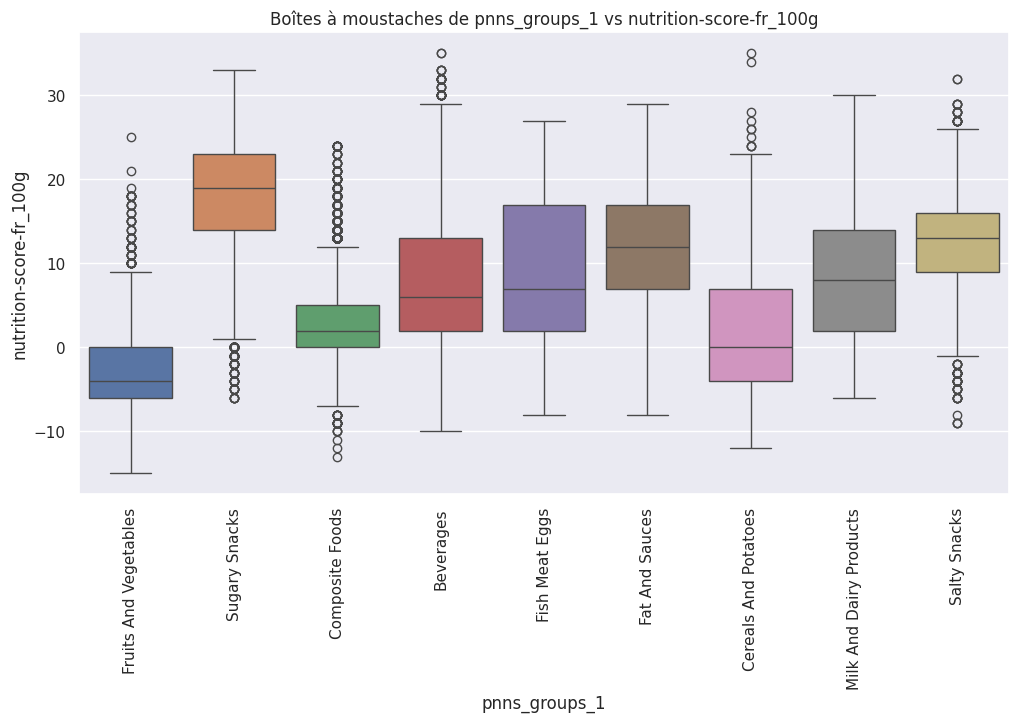

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_data_clean, x='pnns_groups_1', y='nutrition-score-fr_100g', hue='pnns_groups_1')
plt.xticks(rotation=90)
plt.title('Boîtes à moustaches de pnns_groups_1 vs nutrition-score-fr_100g')
plt.xlabel('pnns_groups_1')
plt.ylabel('nutrition-score-fr_100g')
plt.show()

In [100]:
res_anova_nutrition_score = anova_test(subset_data_clean, 'pnns_groups_1', 'nutrition-score-fr_100g')
res_anova_nutrition_score

{'fvalue': 4963.644461281749, 'pvalue': 0.0}

*Interprétation*

Le **score nutritionnel (`nutrition-score-fr_100g`) semble être une variable potentiellement utile** dans un modèle prédictif visant à classer les groupes d'aliments (`pnns_groups_1`).

1. **Résultat du test ANOVA** :
   - La valeur F de 4963.64, très élevée, indique que les différences de scores nutritionnels entre les groupes sont très importantes comparées aux variations internes à chaque groupe.
   - La p-valeur de 0.0 signifie que ces différences sont hautement significatives. Cela confirme que le `nutrition-score-fr_100g` varie de manière significative selon les groupes d'aliments, ce qui suggère qu'il peut aider à différencier les groupes.

2. **Observations du graphique** :
   - Le diagramme en boîtes à moustaches montre que les groupes ont des distributions de scores nutritionnels distinctes. Par exemple, les "Fruits And Vegetables" ont des scores plus faibles (meilleure qualité nutritionnelle), tandis que les "Sugary Snacks" et "Fat And Sauces" ont des scores plus élevés (qualité nutritionnelle moindre). Les groupes comme "Fish Meat Eggs" et "Cereals And Potatoes" montrent des scores intermédiaires avec une dispersion importante.
   - Cette variation entre groupes indique que le score nutritionnel est lié aux caractéristiques des groupes d’aliments et pourrait ainsi être une variable discriminante.

> Les résultats de l'ANOVA et le graphique montrent que `nutrition-score-fr_100g` est un indicateur significatif des différences entre les groupes alimentaires. Il est donc pertinent d'inclure cette variable dans un modèle de classification pour `pnns_groups_1`.

#### Relation entre `pnns_groups_1` et les macronutriments

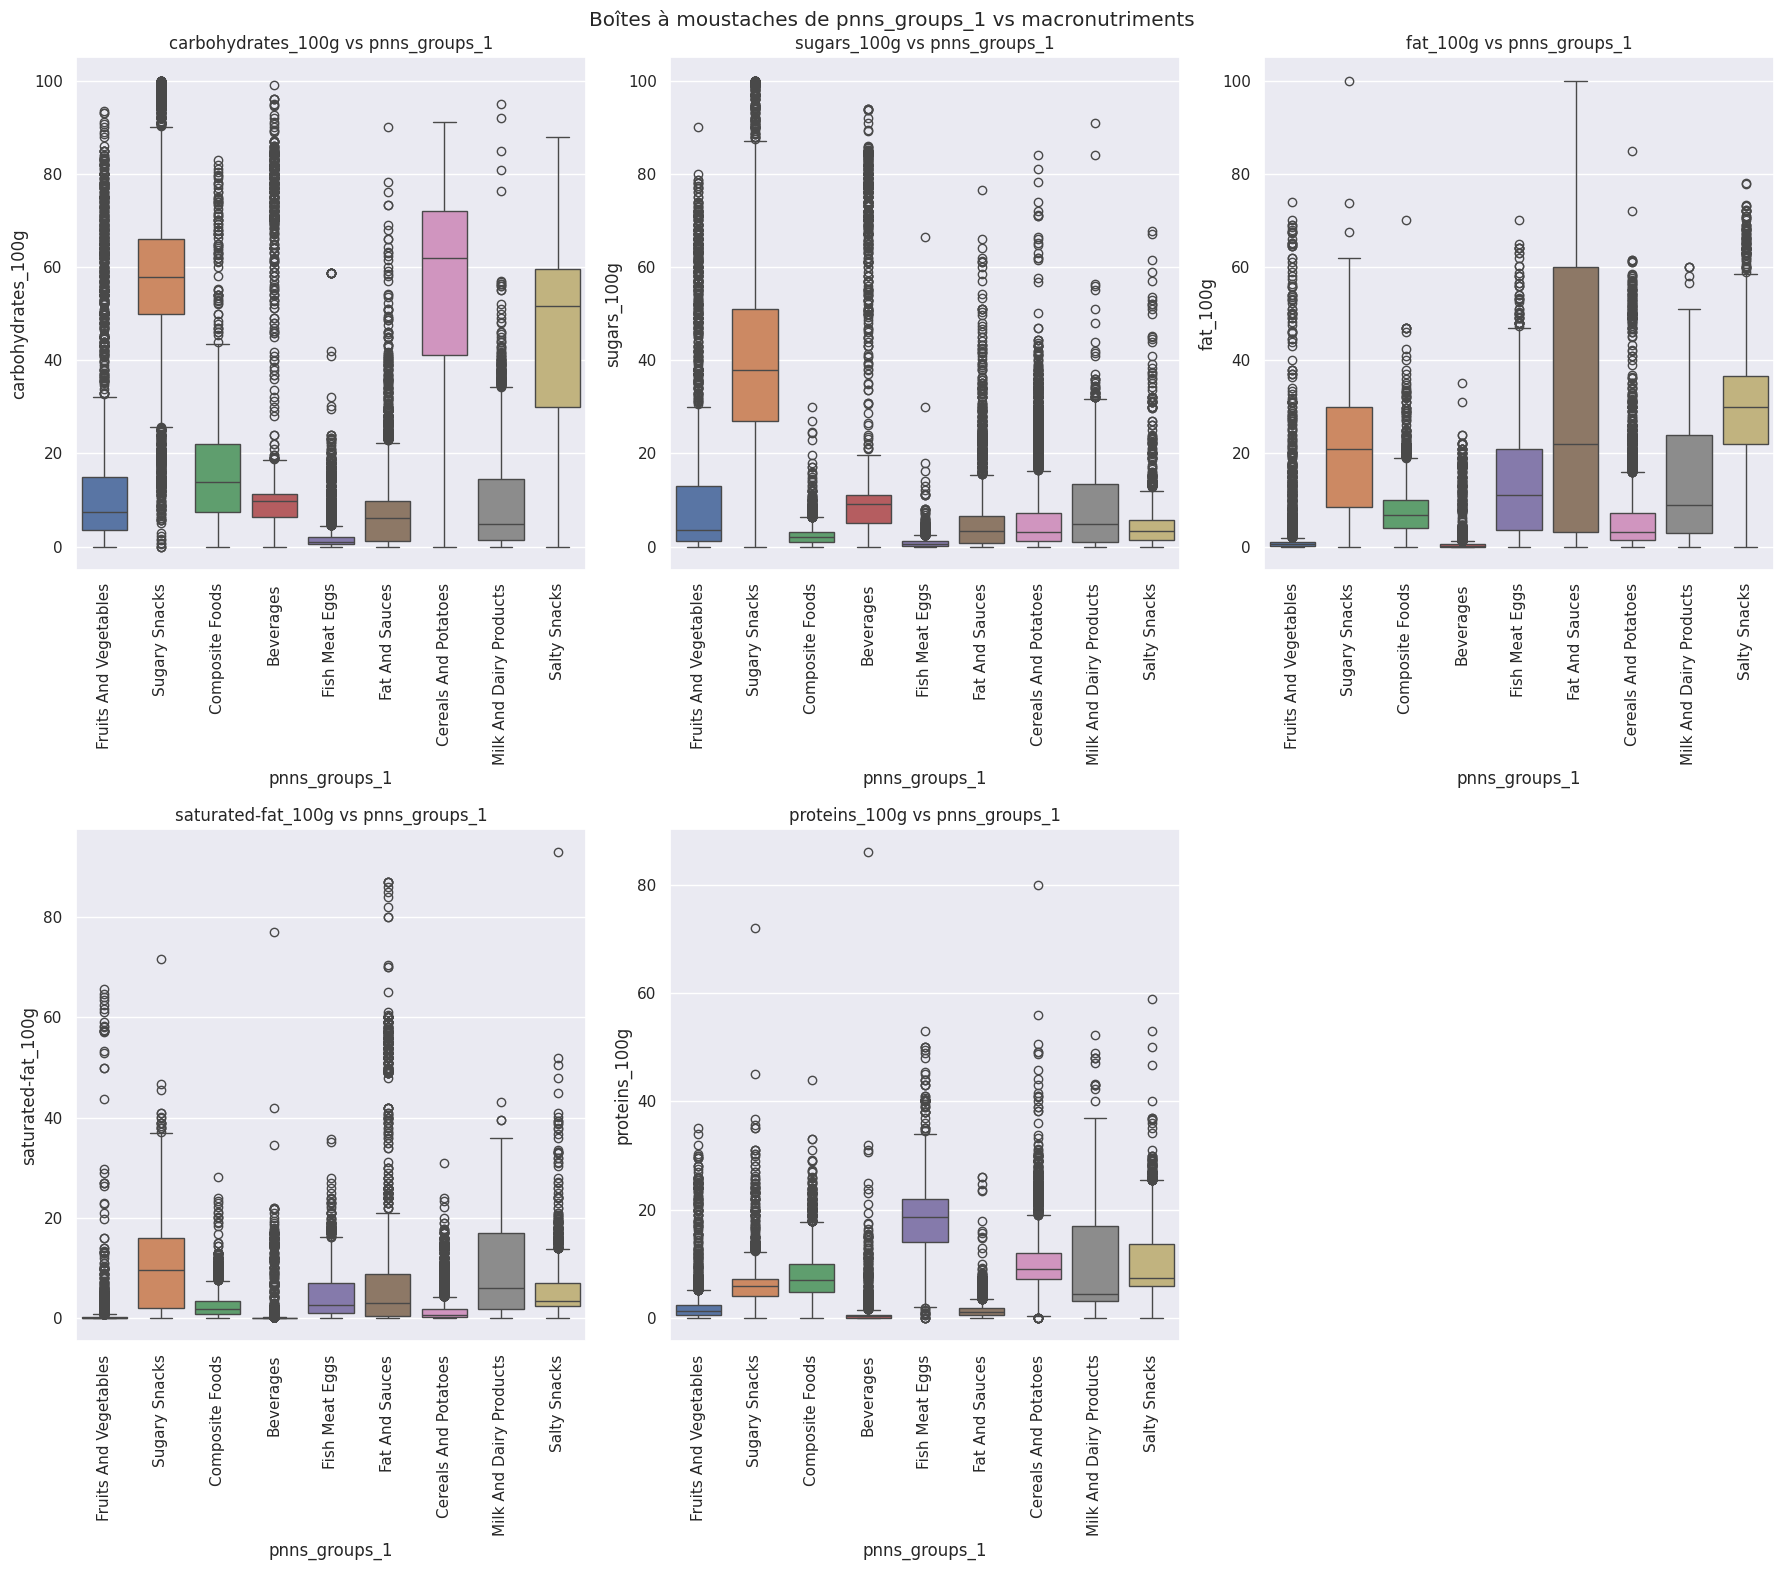

In [101]:
def create_multi_plot_grid(data, x_var, y_vars, num_cols, title=None):
    """
    Creates a structured multi-plot grid of violin plots.

    Args:
        data (pd.DataFrame): The input DataFrame.
        x_var (str): The name of the column for the x-axis (pnns_groups_1).
        y_vars (list): A list of column names for the y-axis (quantitative variables).
    """

    num_plots = len(y_vars)
    # num_cols = 2  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8 * num_rows))
    axes = axes.ravel()

    for i, y_var in enumerate(y_vars):
        sns.boxplot(data=data, x=x_var, y=y_var, ax=axes[i], hue=x_var)
        axes[i].set_title(f'{y_var} vs {x_var}')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    if title:
      plt.suptitle(title)
    plt.tight_layout()
    plt.show()

macronutrients = ['carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'proteins_100g']
create_multi_plot_grid(subset_data_clean, 'pnns_groups_1', macronutrients, 3, 'Boîtes à moustaches de pnns_groups_1 vs macronutriments')

In [102]:
for nutri in macronutrients:
  res_anova = anova_test(subset_data_clean, 'pnns_groups_1', nutri)
  print(f"{nutri}")
  for key, value in res_anova.items():
    print("-", key, value)

carbohydrates_100g
- fvalue 11313.5208783581
- pvalue 0.0
sugars_100g
- fvalue 6525.217775976739
- pvalue 0.0
fat_100g
- fvalue 2914.922896634154
- pvalue 0.0
saturated-fat_100g
- fvalue 1719.574260456177
- pvalue 0.0
proteins_100g
- fvalue 5009.540266106587
- pvalue 0.0


*Interprétation*

En utilisant la même méthode que précédemment, les résultats des ANOVAs et les graphiques montrent que les macro-nutriments sont un indicateur significatif des différences entre les groupes alimentaires. Il est donc pertinent d'inclure ces variables dans un modèle de classification pour `pnns_groups_1`.

#### Relation entre `pnns_groups_1` et les additifs



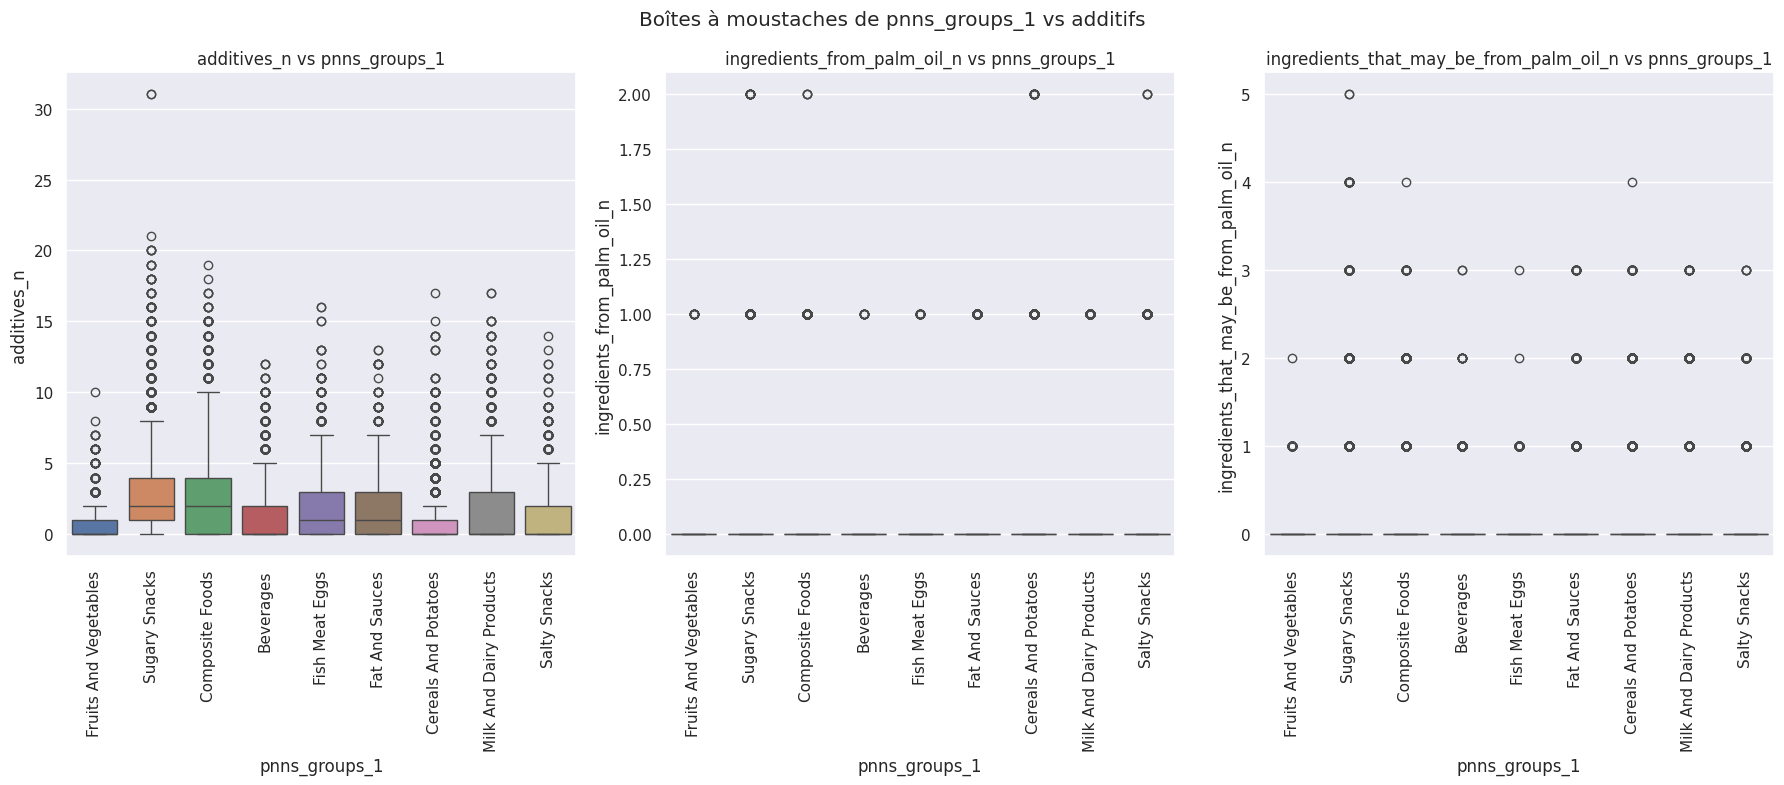

In [103]:
additives = ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
create_multi_plot_grid(subset_data_clean, 'pnns_groups_1', additives, 3, 'Boîtes à moustaches de pnns_groups_1 vs additifs')

In [104]:
for additive in additives:
  res_anova = anova_test(subset_data_clean, 'pnns_groups_1', additive)
  print(f"{additive}")
  for key, value in res_anova.items():
    print("-", key, value)

additives_n
- fvalue 532.3811557950598
- pvalue 0.0
ingredients_from_palm_oil_n
- fvalue 427.9302735944964
- pvalue 0.0
ingredients_that_may_be_from_palm_oil_n
- fvalue 183.00961658620295
- pvalue 7.761367589461213e-306


*Interprétation*

Les résultats de l'ANOVA montrent des différences significatives pour les trois variables (`additives_n`, `ingredients_from_palm_oil_n`, et `ingredients_that_may_be_from_palm_oil_n`) en fonction des groupes d'aliments (`pnns_groups_1`).

- La valeur F de `additives_n` (532.38) est la plus élevée, indiquant des différences particulièrement marquées dans l'usage d'additifs entre les groupes.
- `ingredients_from_palm_oil_n` et `ingredients_that_may_be_from_palm_oil_n` ont également des valeurs F importantes (427.93 et 183.01 respectivement), suggérant que la présence d'ingrédients liés à l'huile de palme varie aussi significativement entre les groupes.

> Ces résultats, combinés aux p-valeurs proches de zéro, indiquent que ces variables sont toutes informatives pour différencier les groupes d'aliments et pourraient être utiles dans un modèle de classification.


#### Relation entre `pnns_groups_1` et le sel

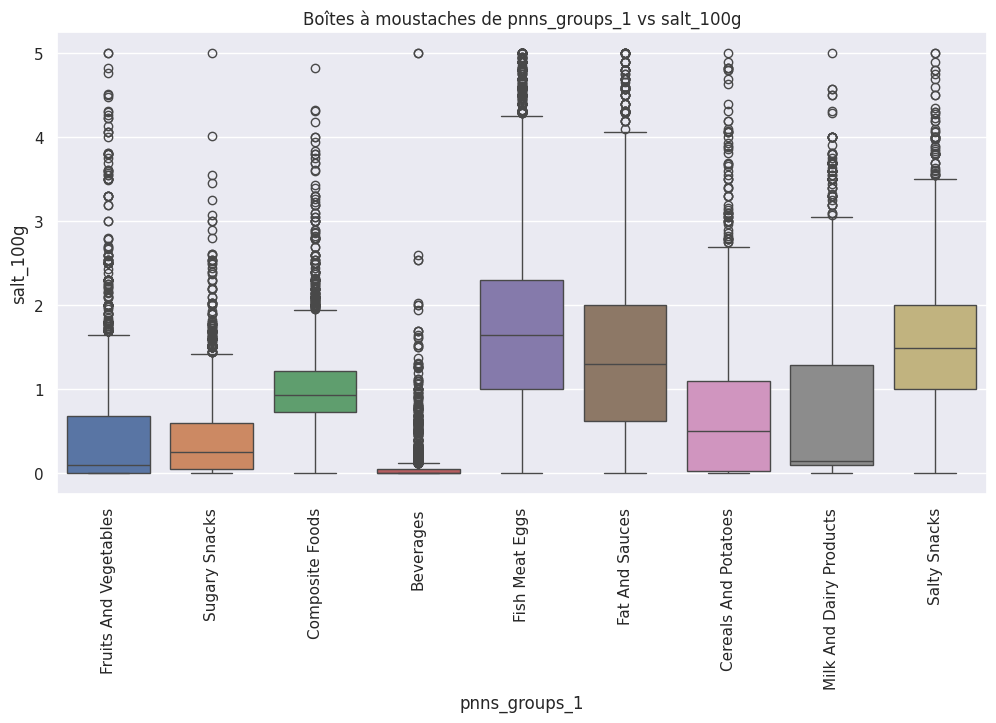

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_data_clean, x='pnns_groups_1', y='salt_100g', hue='pnns_groups_1')
plt.xticks(rotation=90)
plt.title('Boîtes à moustaches de pnns_groups_1 vs salt_100g')
plt.xlabel('pnns_groups_1')
plt.ylabel('salt_100g')
plt.show()

In [106]:
res_anova_salt = anova_test(subset_data_clean, 'pnns_groups_1', 'salt_100g')
print(f"salt_100g : {res_anova}")

salt_100g : {'fvalue': 183.00961658620295, 'pvalue': 7.761367589461213e-306}


*Interprétation*

Les résultats de l'ANOVA pour `salt_100g` montrent une valeur F de 183.01 et une p-valeur extrêmement faible (près de zéro), ce qui indique des différences significatives dans la teneur en sel entre les groupes d’aliments (`pnns_groups_1`). La valeur F élevée suggère que les moyennes de sel varient notablement entre les groupes.

> Ainsi, la teneur en sel (`salt_100g`) pourrait être une variable pertinente pour différencier les groupes d'aliments dans un modèle prédictif, car elle apporte une information discriminante significative entre ces catégories.



## Étape 5 : Réalisez une analyse multi-variée

**L'analyse multivariée** est un ensemble de techniques statistiques qui permettent d'analyser simultanément plusieurs variables.

**Visualisation** : Explorer la relation entre trois variables simultanément peut être réalisé à travers un diagramme de dispersion avec deux variables sur les axes horizontaux et verticaux, tandis qu'une troisième variable peut être intégrée en utilisant la taille ou la couleur des points.

**Analyse en Composantes Principales (ACP) :**
* **But :** Réduire la dimensionnalité des données en identifiant les combinaisons linéaires des variables initiales qui expliquent le plus de variance.
* **Intérêt :** Permet de visualiser les données dans un espace de dimension réduite et d'identifier les variables qui contribuent le plus à la formation de ces nouveaux axes.

**analyse de corrélation canonique (CCA)  ??**



### Visualisation avec `sns.pairplot()`

La fonction `sns.pairplot()` génère automatiquement des **diagrammes de dispersion** pour chaque paire de variables numériques, ainsi que des histogrammes ou des densités pour chaque variable sur la diagonale. Cette fonction est particulièrement utile pour détecter des corrélations, des patterns et des anomalies dans les données.

> Dans notre cas, les variables quantitatives sont représentées sur les axes des abscisses et des ordonnées, tandis que notre variable cible qualitative est utilisée pour différencier les points par leur couleur.

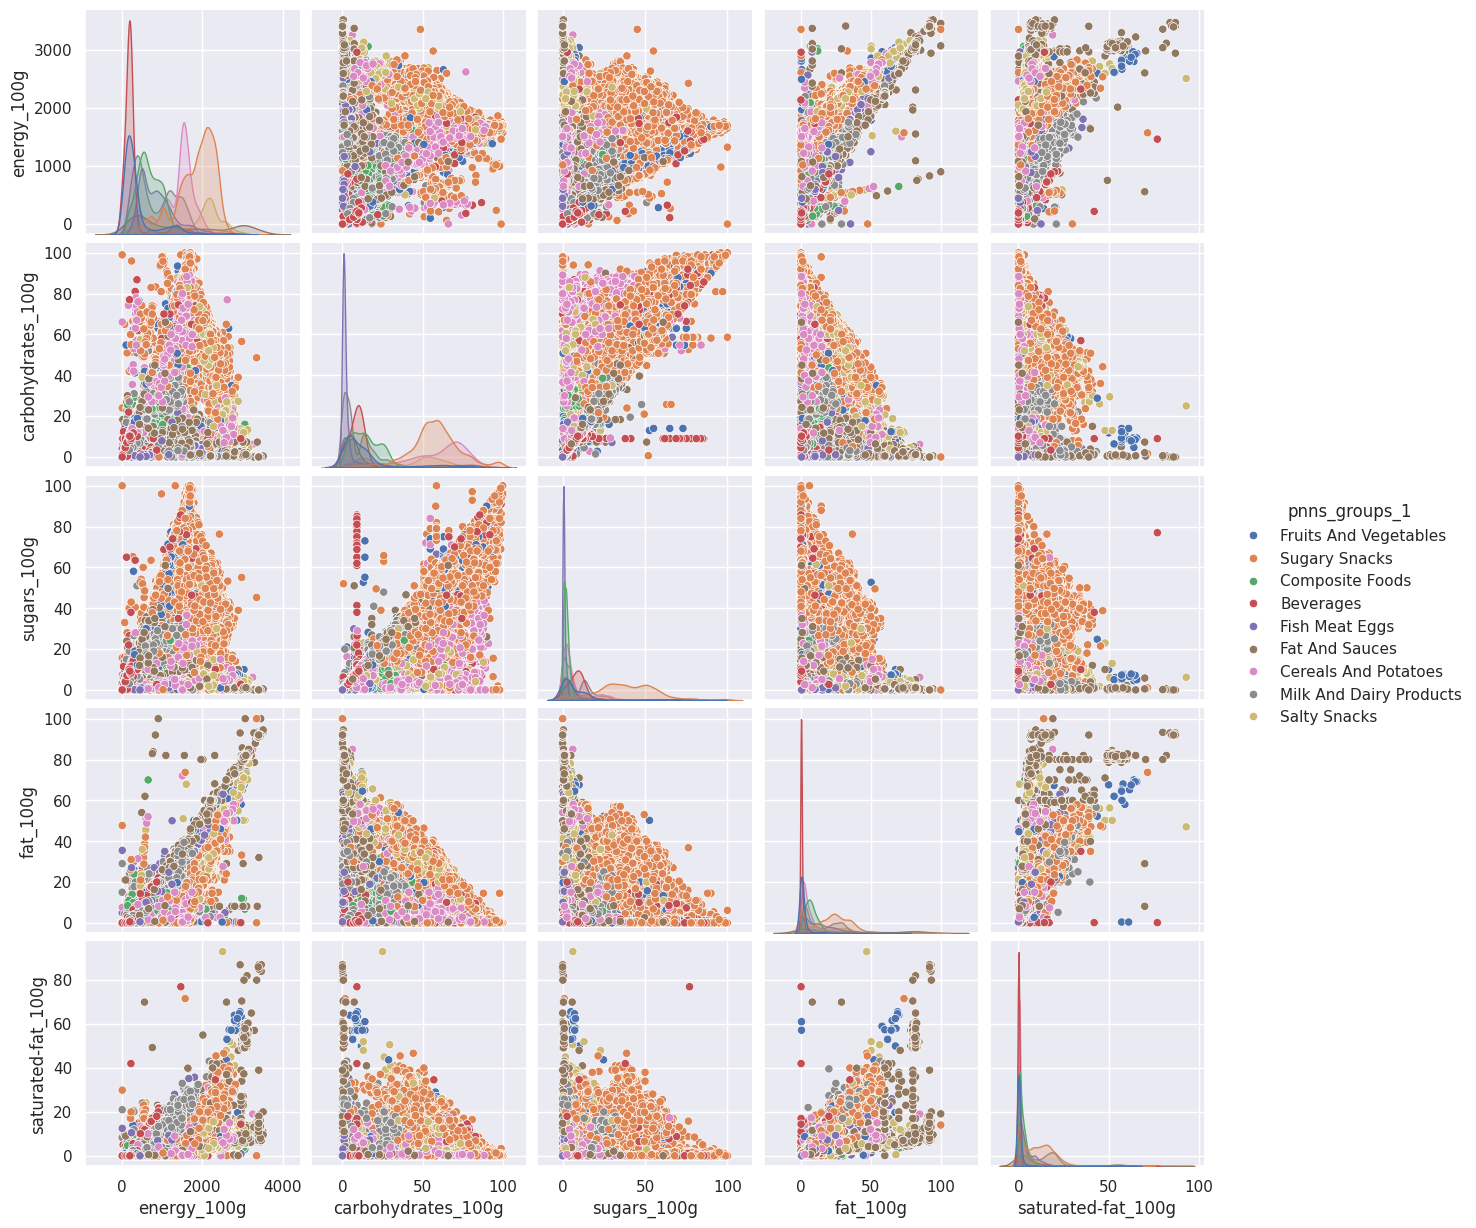

In [107]:
# 🚨 Temps d'execution très long
sns.pairplot(data=subset_data_clean[['pnns_groups_1', 'energy_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g']], hue='pnns_groups_1')

Les graphiques sont des **graphiques de corrélation** (ou **pair plots**). Ils permettent de visualiser les relations entre plusieurs variables numériques. Chaque point représente un aliment, et sa position sur le graphique indique sa valeur pour les deux variables considérées. La couleur des points permet de distinguer les différentes catégories d'aliments (définies par la variable `pnns_groups_1`).

L'objectif de ces graphiques est d'explorer visuellement si la composition nutritionnelle (énergie, glucides, sucres, lipides saturés) est un bon indicateur pour différencier les différentes catégories d'aliments.

* **Tendances générales :**
    * **Aliments énergétiques:** Les aliments riches en énergie (hautes valeurs sur l'axe des énergies) sont souvent associés à des aliments transformés (snacks, produits laitiers entiers).
    * **Aliments riches en sucres:** Les aliments riches en sucres sont principalement les snacks sucrés et certains produits laitiers.
    * **Aliments riches en graisses saturées:** Les viandes, les produits laitiers entiers et certains snacks sont généralement plus riches en graisses saturées.
    * **Aliments riches en glucides:** Les céréales, les fruits et les légumes sont généralement riches en glucides.

**Observations :**

* **Hétérogénéité au sein des catégories:** On observe une grande variabilité au sein de chaque catégorie d'aliments. Par exemple, les "fruits et légumes" ne sont pas tous faibles en calories ou en sucres.
* **Pas de séparation nette:** Il n'y a pas de séparation nette entre les différentes catégories d'aliments sur la base des seuls critères nutritionnels présentés. Les nuages de points se chevauchent fortement, ce qui suggère que la composition nutritionnelle seule ne suffit pas à catégoriser de manière fiable les aliments.


### Analyse en Composantes Principales (ACP)

L'Analyse en composantes principales (ACP) pourrait aider à identifier les principales dimensions de la variabilité des données et à réduire la dimensionnalité du problème.



In [108]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = subset_data_clean.select_dtypes(include=['number']).columns
X = subset_data_clean[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['pnns_groups_1'] = subset_data_clean['pnns_groups_1']

# Explained variance ratio
print('Variances expliquées par les composantes principales')
print(f"PC1 : {round(pca.explained_variance_ratio_[0]* 100, 2)} %")
print(f"PC2 : {round(pca.explained_variance_ratio_[1]* 100, 2)} %")
# print(f"PC3 : {round(pca.explained_variance_ratio_[2]* 100, 2)} %")

# Loadings (contribution of original variables to principal components)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numerical_features)
loadings

Variances expliquées par les composantes principales
PC1 : 31.68 %
PC2 : 19.47 %


PC1       PC2
additives_n                              0.105166  0.180116
ingredients_from_palm_oil_n              0.190055  0.176087
ingredients_that_may_be_from_palm_oil_n  0.111963  0.148340
energy_100g                              0.488890 -0.005007
fat_100g                                 0.427762 -0.263163
saturated-fat_100g                       0.408319 -0.209400
carbohydrates_100g                       0.238234  0.444814
sugars_100g                              0.252657  0.476586
proteins_100g                            0.112569 -0.437861
salt_100g                                0.099983 -0.429732
nutrition-score-fr_100g                  0.456406 -0.005747

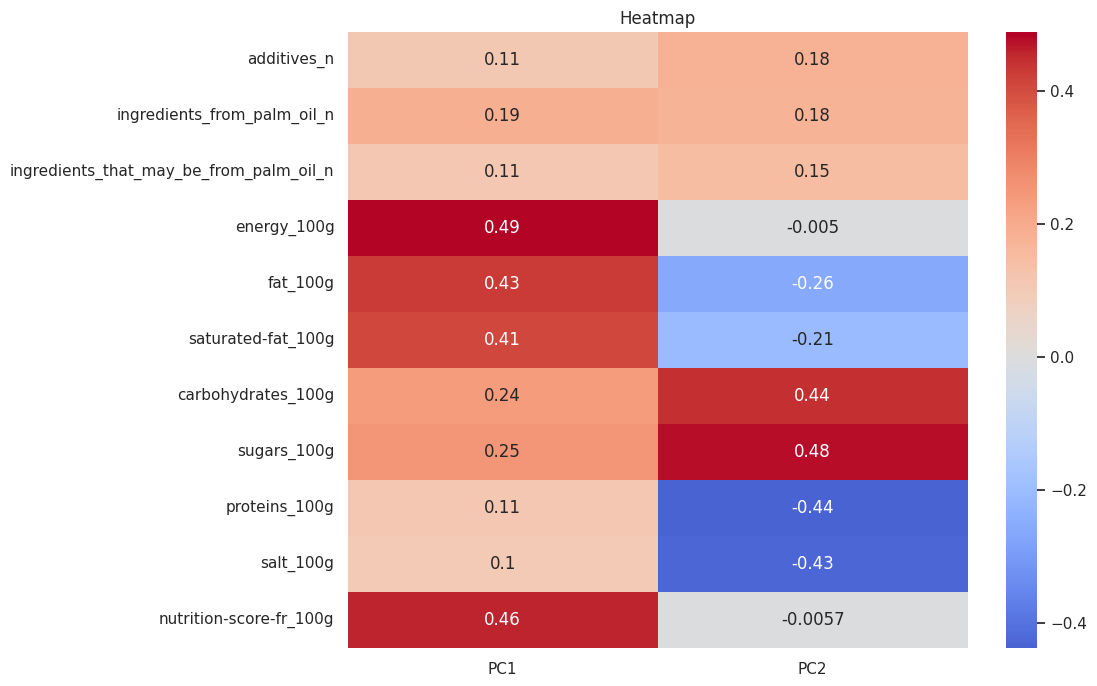

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap')
plt.show()

#### Visualisations

Pour une meilleure compréhension, nous visualisons les résultats de l'ACP à l'aide de graphiques tels que :

* **Cercle des corrélations:** Permet de visualiser les corrélations entre les variables initiales et les composantes principales.
* **Projection des individus:** Permet de visualiser la position des individus (aliments) dans l'espace des composantes principales.

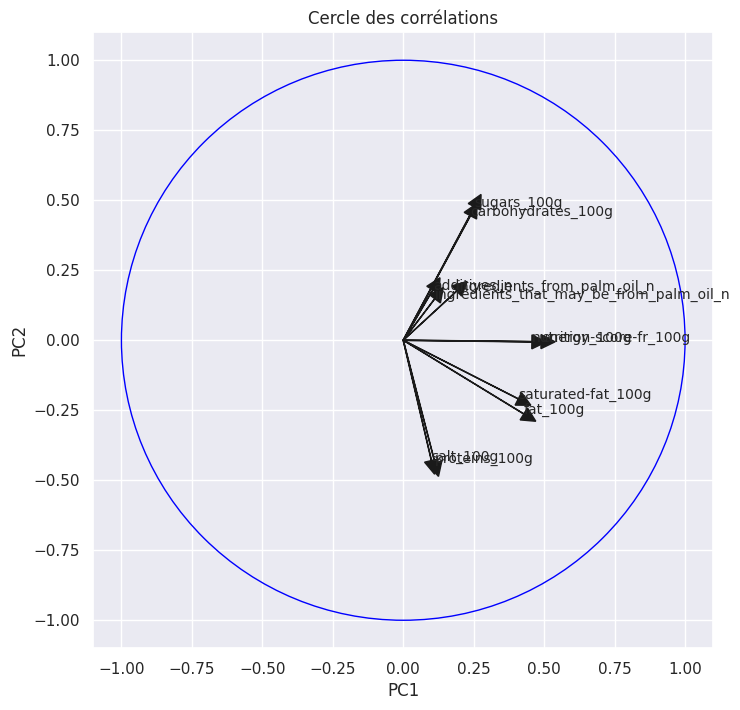

In [110]:
# Cercle des corrélations: Permet de visualiser les corrélations entre les variables initiales et les composantes principales.
def plot_correlation_circle(pca, x_axis, y_axis, labels):
    """
    Plots the correlation circle for PCA analysis.

    Args:
        pca: The fitted PCA object.
        x_axis: Index of the first principal component.
        y_axis: Index of the second principal component.
        labels: List of labels for the variables.
    """
    plt.figure(figsize=(8, 8))
    for i, (x, y) in enumerate(zip(pca.components_[x_axis, :], pca.components_[y_axis, :])):
        plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='k', ec='k')
        plt.text(x, y, labels[i], fontsize=10)

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)

    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    plt.gca().add_patch(circle)

    plt.xlabel(f'PC{x_axis+1}')
    plt.ylabel(f'PC{y_axis+1}')
    plt.title('Cercle des corrélations')
    plt.grid(True)
    plt.show()

plot_correlation_circle(pca, 0, 1, loadings.index)

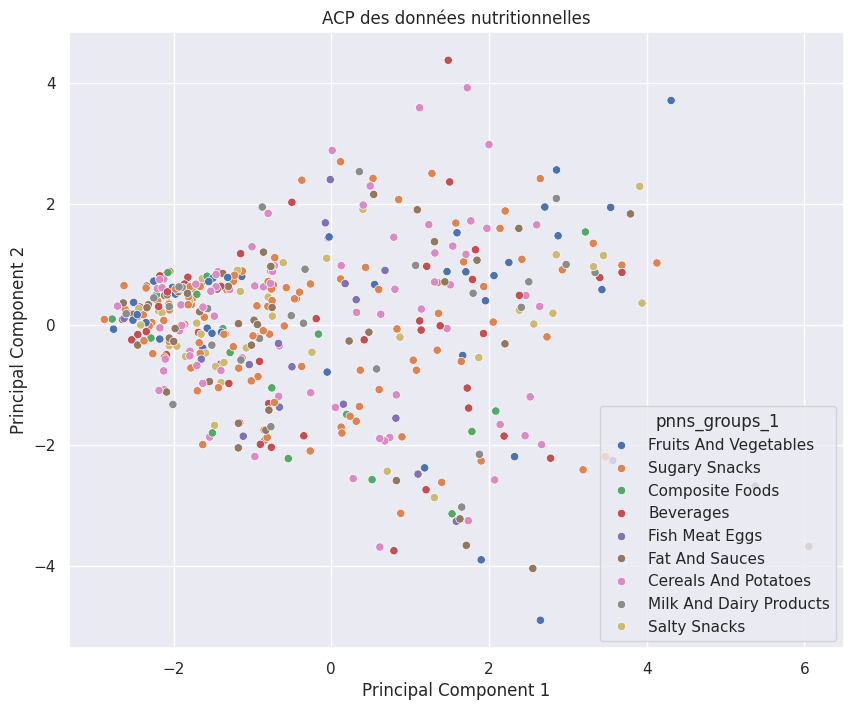

In [111]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='pnns_groups_1', data=pca_df)
plt.title('ACP des données nutritionnelles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Interprétation des résultats de l'ACP

##### Variance expliquée par les composantes principales

La première composante principale (PC1) explique **31,68%** de la variance totale des données, tandis que la deuxième composante principale (PC2) explique **19,47%**. Ensemble, elles expliquent donc **51,15 %** de la variance totale.

##### **Chargement des variables sur les composantes principales**

**Les chargements (loadings) indiquent la corrélation entre chaque variable originale et les composantes principales**. Plus le chargement est élevé en valeur absolue, plus la variable contribue fortement à la composante principale.

**Interprétation des composantes principales:**

* **Composante principale 1 (PC1):**
    * Forte corrélation positive avec les variables liées à la teneur en matières grasses (énergie, lipides totaux, lipides saturés) et les additifs.
    * Cela suggère que cette composante principale représente un axe de variation lié à la **densité énergétique** et à la **transformation industrielle** des aliments.

* **Composante principale 2 (PC2):**
    * Forte corrélation positive avec les sucres et les glucides.
    * Forte corrélation négative avec les protéines et le sel.
    * Cela suggère que cette composante principale représente un axe de variation lié à la **composition nutritionnelle** des aliments, en particulier la balance entre glucides et protéines.


**Conclusion**

L'ACP a permis d'identifier deux principales sources de variation dans les données :
- la **densité énergétique**
- la **composition nutritionnelle**.

Ces deux dimensions peuvent être utilisées pour mieux comprendre les différences entre les aliments et pour développer des modèles prédictifs ou de classification.

> Cependant, l'ACP n'est pas réellement concluante. Visuellement, la séparation des données est faible. Ce qui demandera d'utiliser des modèle plus complexes : XGBoost, SVM, Deep Learning.


---


## Rapport d’Exploration

### Contexte et Objectif

L'objectif de cette analyse exploratoire est d'**évaluer la pertinence des variables sélectionnées dans la prédiction de la catégorie d'aliment (`pnns_groups_1`)**, et de poser les bases pour le développement d'un modèle prédictif efficace.

### Étapes Réalisées

1. **Compréhension des Données** : familiarisation avec la structure des données, exploration des types de variables.
2. **Sélection de la cible** : sélection d'une variable catégorielle ayant moins de 50 % de valeurs manquantes et un nombre adequat de modalités.
3. **Traitement des Données** : nettoyage et préparation des données, en gérant les valeurs manquantes, les valeurs aberrantes et les outliers.
4. **Choix des Variables Pertinentes** : sélection des variables les plus informatives et pertinentes pour prédire la cible.
5. **Analyses univariées, bivariées et multi-variées** : exploration des relations entre les différentes variables et la cible par des analyses statistiques et graphiques.

---

#### Observation 1 : Relation entre les variables sélectionnées et la cible `pnns_groups_1`

Les analyses bivariées ont révélé des liens significatifs entre les variables  et la cible `pnns_groups_1`.

Les test de Chi-2 pour `nutrition_grade_fr` et `main_category_fr` et les tests ANOVA pour les variables quantitatives, ont montré des **valeurs élevées** et des **p-valeurs proches de zéro**, indiquant que des différences significatives existent entre les modalités de la cible pour plusieurs variables. Cela montre que **ces variables peuvent jouer un rôle important dans la distinction entre les différentes catégories d’aliments**.

---

#### Observation 2 : Visualisations Multi-Variées et Potentiel de Séparation des Catégories

Les diagrammes de dispersion confirment la présence de motifs distinctifs entre `pnns_groups_1` et les variables sélectionnées. Bien que les groupes ne soient pas totalement séparés, **les tendances observées indiquent qu'il est possible de discriminer certaines catégories d'aliments à partir de combinaisons de variables nutritionnelles**.

---

#### Observation 3 : Limites de l’Analyse en Composantes Principales

L’Analyse en Composantes Principales (ACP) a été réalisée pour réduire la dimension des données et permettre une visualisation simplifiée, dans l’objectif de repérer des regroupements éventuels entre les catégories d’aliments.

Cependant, **les résultats montrent que la séparation visuelle des catégories reste limitée**, ce qui suggère que les premières composantes ne capturent pas suffisamment d’information pour discriminer clairement la variable cible. En effet, l'ACP explique seulement **51,15 %** de la variance totale, ce qui limite sa capacité à bien représenter l'ensemble des données.

---

#### Observation 4 : Corrélations Significatives entre Variables

L’analyse des corrélations a révélé des **liens significatifs entre certaines variables quantitatives**, en particulier parmi les indicateurs de graisses et de sucres. Ces corrélations doivent être prises en compte pour limiter les redondances dans le modèle final.

Nous recommandons de supprimer `saturated-fat_100g`, fortement corrélé avec `fat_100g` et `energy_100g`. Il faut également être vigilant avec `sugars_100g` pour éviter les duplications d’information. Deux approches possibles : soit sélectionner une seule variable par paire corrélée, soit utiliser des algorithmes peu sensibles aux problèmes de multicolinéarité, tels que les **arbres de décision**, **Random Forest**, ou **XGBoost**.

---



## Conclusion sur la faisabilité de l'application

> Ce rapport montre qu’il existe une **base solide pour prédire la catégorie d’un aliment en fonction des variables sélectionnées**, bien que certains ajustements soient nécessaires.

> La réalisation d'une application de suggestion ou d'auto-complétion d'aliments basée sur leurs valeurs nutritionnelles apparaît tout à fait réalisable.

Plusieurs éléments plaident en faveur de cette faisabilité :

* **Absence de contraintes techniques majeures:** Les algorithmes de machine learning nécessaires à ce type de tâche sont matures et largement disponibles dans des bibliothèques comme Scikit-learn, TensorFlow ou PyTorch.
* **Disponibilité de données suffisantes:** La présence d'un volume de données adéquat est essentielle pour entraîner un modèle robuste. Ces données, contenant les valeurs nutritionnelles et les catégories d'aliments, permettront au modèle d'apprendre les corrélations entre les différentes caractéristiques.
* **Possibilité d'expérimentation:** Le domaine du machine learning offre une grande variété d'algorithmes. En testant différents modèles (régression logistique, arbres de décision, forêts aléatoires, réseaux de neurones, etc.), il sera possible d'identifier celui qui offre les meilleures performances sur notre jeu de données spécifique.

**En procédant par étapes et en évaluant régulièrement les résultats, nous devrions être en mesure de développer un modèle de classification précis et fiable.**

**Les prochaines étapes pourraient consister à :**

* **Sélectionner les algorithmes:** Choisir les algorithmes les plus prometteurs en fonction de la nature des données et des objectifs du projet.
* **Entraîner et évaluer les modèles:** Entraîner les modèles sur les données d'entraînement, puis évaluer leurs performances sur un ensemble de données de test.
* **Optimiser les hyperparamètres:** Ajuster les paramètres des modèles pour améliorer leurs performances.
* **Déployer le modèle:** Intégrer le modèle final au site d'Open Food Facts qui collecte les données alimentaires.

En suivant cette méthodologie, nous pourrons **développer une solution efficace pour la classification d'aliments**.

<img src="https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg" />

### Documentation :

- https://scikit-learn.org/stable/machine_learning_map.html



## Respect du règlement général de protection des données (RGPD)

### Le RGPD, qu’est-ce que c’est ?

Le **règlement général de protection des données** (RGPD) **encadre le traitement des données personnelles** sur le territoire de l’Union européenne. Il est entré en application le 25 mai 2018. Il a été conçu autour de trois objectifs : renforcer les droits des personnes, responsabiliser les acteurs traitant des données et crédibiliser la régulation grâce à une coopération renforcée entre les autorités de protection des données.

**Le RGPD concerne toute organisation, publique ou privée, qui traite des données personnelles**, quelle que soit sa taille ou son pays d'implantation. Il s'applique aux entités établies dans l'Union européenne et à celles qui ciblent directement des résidents européens.

### Les 5 grands principes du RGPD

Voici les cinq principes fondamentaux du RGPD :

1. **Licéité, loyauté et transparence** : Le traitement des données doit être légal, loyal et transparent, avec information claire et complète aux personnes concernées sur la collecte et l’utilisation des données.

2. **Limitation des finalités** : Les données personnelles doivent être traitées uniquement pour les objectifs spécifiques et légitimes pour lesquels elles ont été collectées.

3. **Minimisation des données** : Les données collectées doivent être adéquates, pertinentes et limitées à ce qui est nécessaire pour atteindre les objectifs du traitement.

4. **Exactitude** : Les données doivent être exactes et mises à jour, avec des mesures pour corriger toute inexactitude signalée.

5. **Conservation limitée** : Les données doivent être conservées pour une durée déterminée, protégées, puis supprimées quand elles ne sont plus nécessaires.

### La base de données Open Food Facts

Les données utlisées pour ce projet proviennent de la base de données [Open Food Facts](https://fr.openfoodfacts.org/). C'est **une base de données de produits alimentaires** avec leurs ingrédients, allergènes, valeurs nutritionnelles et toutes les informations que l'on peut trouver sur les étiquettes de ces produits. C'est un projet collaboratif avec des **contributeurs du monde entier**.

La base de données est publiée sous forme de **données ouvertes (open data)** sous la license [Open Database Licence](https://en.wikipedia.org/wiki/Open_Database_License). **Tout le monde peut l'utiliser à n'importe quelle fin** - commerciale ou non - à condition que **la source des données soit indiquée** et que les améliorations apportées à la base de données soient partagées de la même manière.

> La plateforme respecte le RGPD en protégeant les données personnelles des contributeurs et en limitant les données aux informations à caractère public des produits.

### Notre projet est-il concerné par le RGPD ?

**Le RGPD (Règlement Général sur la Protection des Données) concerne exclusivement les données personnelles**, c'est-à-dire toute information permettant d'identifier, directement ou indirectement, une personne physique (nom, adresse, numéro de téléphone, adresse IP, etc.).

> Dans le cadre de ce projet, **les données d'Open Food Facts ne contiennent pas de données personnelles**.

Cependant, même en l'absence de données personnelles, **il est fréquent que les projets de traitement de données, surtout dans le secteur public et de la santé, respectent volontairement les principes du RGPD**. Cela permet de garantir une **transparence** et une **conformité aux bonnes pratiques de gestion des données** et de répondre aux attentes éthiques de certains utilisateurs et partenaires.

**Il est donc dans l'interêt de l'agence Santé Publique France de respecter les principes du RGPD**, même si les données concernent des aliments et non des données personnelles.


### Notre projet respecte-t-il les 5 grands principes du RGPD ?

Pour ce projet, **Santé Publique France n'est pas l'organisme qui collecte, traite et stocke les données concernant les produits alimentaires**. Santé Publique France exploite les données mise à disposition librement par Open Food Facts.

Cependant, **Notre projet est concerné par le RGPD, même si les données ne contiennent pas d’informations personnelles**. En effet, le respect des principes du RGPD est de plus en plus demandé pour des projets de données dans le secteur public, y compris les données open source comme celles d'Open Food Facts.

Voici comment le RGPD s'applique dans ce contexte :

1. ✅ **Licéité, loyauté et transparence** : Les données traitées pour ce projet sont obtenues légalement et en toute transparence auprès d'Open Food Facts (qui met ces données à disposition de tous-tes).
2. ✅ **Limitation des finalités** : Les données collectées sont utilisées uniquement pour le développement d'un modèle d’auto-complétion et rien de plus.
3. ✅ **Minimisation des données** : Seules les données nécessaires au développement du modèle sont collectées (données concernant les aliments pour la France).
4. ✅ **Exactitude** : L'exactitude des données est contrôlée lors du traitement des données, notamment car elles sont cruciales pour le développement d'un modèle performant.
5. ✅ **Limitation de conservation** : Les données collectées pour le développement du modèle ne sont pas stockées dans une base de données.

> Ce respect des principes du RGPD montre **une approche éthique et responsable** des données, même dans un contexte sans données personnelles.

### Sources

Pour plus de détails, vous pouvez consulter :
- [Le site de la CNIL](https://www.cnil.fr/fr/rgpd)
- [Le règlement général sur la protection des données (RGPD), mode d’emploi](https://www.economie.gouv.fr/entreprises/reglement-general-protection-donnees-rgpd)
- [Quels sont les 5 principes du RGPD ?](https://www.dpo-partage.fr/principes-du-rgpd/)


